# Clean multilevel table

In [2]:
import sys
import json
import ast # handle single/double quote in dict/json string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [17]:
df = pd.read_excel('https://github.com/prasertcbs/basic-dataset/raw/master/starbucks_bakery.xlsx')
df.head()

,Product Name,Label Wt (g),Calories,Total fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugar (g),Protein (g),Vitamin A (%DV),Vitamin C (%DV),Calcium (%DV),Iron (%DV)
0,"COOKIES, BROWNIES & BARS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cherry Oat Bar,92.0,310.0,10.0,6.0,0.0,35.0,240.0,47.0,2.0,28.0,3.0,0.20,0.02,0.00,0.20
2,Double Chocolate Chunk Brownie,84.0,380.0,23.0,7.0,0.3,70.0,170.0,41.0,2.0,28.0,4.0,0.06,0.00,0.04,0.15
3,Gluten Free Marshmallow Dream Bar,60.0,240.0,5.0,3.0,0.1,15.0,260.0,45.0,0.0,23.0,2.0,0.04,0.00,0.00,0.02
4,Oat Fudge Bar,85.0,360.0,20.0,11.0,0.1,20.0,230.0,45.0,3.0,26.0,5.0,0.15,0.02,0.06,0.15


In [18]:
df = df.dropna(subset=['Product Name']).reset_index(drop=True) # drop Null-values in all columns by rows
df.head()

,Product Name,Label Wt (g),Calories,Total fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugar (g),Protein (g),Vitamin A (%DV),Vitamin C (%DV),Calcium (%DV),Iron (%DV)
0,"COOKIES, BROWNIES & BARS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cherry Oat Bar,92.0,310.0,10.0,6.0,0.0,35.0,240.0,47.0,2.0,28.0,3.0,0.20,0.02,0.00,0.20
2,Double Chocolate Chunk Brownie,84.0,380.0,23.0,7.0,0.3,70.0,170.0,41.0,2.0,28.0,4.0,0.06,0.00,0.04,0.15
3,Gluten Free Marshmallow Dream Bar,60.0,240.0,5.0,3.0,0.1,15.0,260.0,45.0,0.0,23.0,2.0,0.04,0.00,0.00,0.02
4,Oat Fudge Bar,85.0,360.0,20.0,11.0,0.1,20.0,230.0,45.0,3.0,26.0,5.0,0.15,0.02,0.06,0.15


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product Name        53 non-null     object 
 1   Label Wt (g)        48 non-null     float64
 2   Calories            48 non-null     float64
 3   Total fat (g)       48 non-null     float64
 4   Saturated  Fat (g)  48 non-null     float64
 5   Trans Fat (g)       48 non-null     float64
 6   Cholesterol (mg)    48 non-null     float64
 7   Sodium (mg)         48 non-null     float64
 8   Carbohydrates (g)   48 non-null     float64
 9   Fiber (g)           48 non-null     float64
 10  Sugar (g)           48 non-null     float64
 11  Protein (g)         48 non-null     float64
 12  Vitamin A (%DV)     48 non-null     float64
 13  Vitamin C (%DV)     48 non-null     float64
 14  Calcium (%DV)       48 non-null     float64
 15  Iron (%DV)          48 non-null     float64
dtypes: float64

In [20]:
df.loc[0] # this is what we don't like

Product Name          COOKIES, BROWNIES & BARS
Label Wt (g)                               NaN
Calories                                   NaN
Total fat (g)                              NaN
Saturated  Fat (g)                         NaN
Trans Fat (g)                              NaN
Cholesterol (mg)                           NaN
Sodium (mg)                                NaN
Carbohydrates (g)                          NaN
Fiber (g)                                  NaN
Sugar (g)                                  NaN
Protein (g)                                NaN
Vitamin A (%DV)                            NaN
Vitamin C (%DV)                            NaN
Calcium (%DV)                              NaN
Iron (%DV)                                 NaN
Name: 0, dtype: object

In [21]:
df.loc[1] # this is what we want

Product Name          Cherry Oat Bar
Label Wt (g)                    92.0
Calories                       310.0
Total fat (g)                   10.0
Saturated  Fat (g)               6.0
Trans Fat (g)                    0.0
Cholesterol (mg)                35.0
Sodium (mg)                    240.0
Carbohydrates (g)               47.0
Fiber (g)                        2.0
Sugar (g)                       28.0
Protein (g)                      3.0
Vitamin A (%DV)                  0.2
Vitamin C (%DV)                 0.02
Calcium (%DV)                    0.0
Iron (%DV)                       0.2
Name: 1, dtype: object

In [22]:
np.isnan(df.loc[0, 'Calories'])

True

In [23]:
np.isnan(df.loc[1, 'Calories'])

False

In [24]:
df['Category'] = df.apply(lambda r: r['Product Name'] if np.isnan(r['Calories']) else np.nan, axis=1)
df.head()

,Product Name,Label Wt (g),Calories,Total fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugar (g),Protein (g),Vitamin A (%DV),Vitamin C (%DV),Calcium (%DV),Iron (%DV),Category
0,"COOKIES, BROWNIES & BARS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"COOKIES, BROWNIES & BARS"
1,Cherry Oat Bar,92.0,310.0,10.0,6.0,0.0,35.0,240.0,47.0,2.0,28.0,3.0,0.20,0.02,0.00,0.20,NaN
2,Double Chocolate Chunk Brownie,84.0,380.0,23.0,7.0,0.3,70.0,170.0,41.0,2.0,28.0,4.0,0.06,0.00,0.04,0.15,NaN
3,Gluten Free Marshmallow Dream Bar,60.0,240.0,5.0,3.0,0.1,15.0,260.0,45.0,0.0,23.0,2.0,0.04,0.00,0.00,0.02,NaN
4,Oat Fudge Bar,85.0,360.0,20.0,11.0,0.1,20.0,230.0,45.0,3.0,26.0,5.0,0.15,0.02,0.06,0.15,NaN


In [25]:
df['Category'] = df['Category'].ffill()
df.head()

,Product Name,Label Wt (g),Calories,Total fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugar (g),Protein (g),Vitamin A (%DV),Vitamin C (%DV),Calcium (%DV),Iron (%DV),Category
0,"COOKIES, BROWNIES & BARS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"COOKIES, BROWNIES & BARS"
1,Cherry Oat Bar,92.0,310.0,10.0,6.0,0.0,35.0,240.0,47.0,2.0,28.0,3.0,0.20,0.02,0.00,0.20,"COOKIES, BROWNIES & BARS"
2,Double Chocolate Chunk Brownie,84.0,380.0,23.0,7.0,0.3,70.0,170.0,41.0,2.0,28.0,4.0,0.06,0.00,0.04,0.15,"COOKIES, BROWNIES & BARS"
3,Gluten Free Marshmallow Dream Bar,60.0,240.0,5.0,3.0,0.1,15.0,260.0,45.0,0.0,23.0,2.0,0.04,0.00,0.00,0.02,"COOKIES, BROWNIES & BARS"
4,Oat Fudge Bar,85.0,360.0,20.0,11.0,0.1,20.0,230.0,45.0,3.0,26.0,5.0,0.15,0.02,0.06,0.15,"COOKIES, BROWNIES & BARS"


In [26]:
df = df.dropna(subset=['Calories']).reset_index(drop=True)
df.head()

,Product Name,Label Wt (g),Calories,Total fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugar (g),Protein (g),Vitamin A (%DV),Vitamin C (%DV),Calcium (%DV),Iron (%DV),Category
0,Cherry Oat Bar,92.0,310.0,10.0,6.0,0.0,35.0,240.0,47.0,2.0,28.0,3.0,0.20,0.02,0.00,0.20,"COOKIES, BROWNIES & BARS"
1,Double Chocolate Chunk Brownie,84.0,380.0,23.0,7.0,0.3,70.0,170.0,41.0,2.0,28.0,4.0,0.06,0.00,0.04,0.15,"COOKIES, BROWNIES & BARS"
2,Gluten Free Marshmallow Dream Bar,60.0,240.0,5.0,3.0,0.1,15.0,260.0,45.0,0.0,23.0,2.0,0.04,0.00,0.00,0.02,"COOKIES, BROWNIES & BARS"
3,Oat Fudge Bar,85.0,360.0,20.0,11.0,0.1,20.0,230.0,45.0,3.0,26.0,5.0,0.15,0.02,0.06,0.15,"COOKIES, BROWNIES & BARS"
4,Blueberry Bar,75.0,250.0,13.0,6.0,0.3,20.0,180.0,35.0,3.0,14.0,4.0,0.15,0.00,0.20,0.10,"COOKIES, BROWNIES & BARS"


In [27]:
df.columns

Index(['Product Name', 'Label Wt (g)', 'Calories', 'Total fat (g)',
       'Saturated  Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)',
       'Sodium (mg)', 'Carbohydrates (g)', 'Fiber (g)', 'Sugar (g)',
       'Protein (g)', 'Vitamin A (%DV)', 'Vitamin C (%DV)', 'Calcium (%DV)',
       'Iron (%DV)', 'Category'],
      dtype='object')

In [28]:
df = df[['Category', 'Product Name', 'Label Wt (g)', 'Calories', 'Total fat (g)',
       'Saturated  Fat (g)', 'Trans Fat (g)', 'Cholesterol (mg)',
       'Sodium (mg)', 'Carbohydrates (g)', 'Fiber (g)', 'Sugar (g)',
       'Protein (g)', 'Vitamin A (%DV)', 'Vitamin C (%DV)', 'Calcium (%DV)',
       'Iron (%DV)']]
df.head()

# df.to_excel('bakery_clean.xlsx', index=False)

,Category,Product Name,Label Wt (g),Calories,Total fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbohydrates (g),Fiber (g),Sugar (g),Protein (g),Vitamin A (%DV),Vitamin C (%DV),Calcium (%DV),Iron (%DV)
0,"COOKIES, BROWNIES & BARS",Cherry Oat Bar,92.0,310.0,10.0,6.0,0.0,35.0,240.0,47.0,2.0,28.0,3.0,0.20,0.02,0.00,0.20
1,"COOKIES, BROWNIES & BARS",Double Chocolate Chunk Brownie,84.0,380.0,23.0,7.0,0.3,70.0,170.0,41.0,2.0,28.0,4.0,0.06,0.00,0.04,0.15
2,"COOKIES, BROWNIES & BARS",Gluten Free Marshmallow Dream Bar,60.0,240.0,5.0,3.0,0.1,15.0,260.0,45.0,0.0,23.0,2.0,0.04,0.00,0.00,0.02
3,"COOKIES, BROWNIES & BARS",Oat Fudge Bar,85.0,360.0,20.0,11.0,0.1,20.0,230.0,45.0,3.0,26.0,5.0,0.15,0.02,0.06,0.15
4,"COOKIES, BROWNIES & BARS",Blueberry Bar,75.0,250.0,13.0,6.0,0.3,20.0,180.0,35.0,3.0,14.0,4.0,0.15,0.00,0.20,0.10


In [29]:
df.groupby('Category').describe()

Label Wt (g)                               \
                                         count        mean        std   min   
Category                                                                      
COOKIES, BROWNIES & BARS                  13.0   78.538462  14.163423  45.0   
CROISSANTS, BAGELS, & BREADS              13.0   97.692308  14.109008  64.0   
DOUGHNUTS, SWEET ROLLS & DANISHES          4.0  102.750000  17.327723  80.0   
LOAVES, COFFEE CAKES, CAKE POPS            9.0   98.888889  34.016336  38.0   
MUFFINS & SCONES                           9.0  102.333333  26.348624  33.0   

                                                               Calories  \
                                      25%    50%    75%    max    count   
Category                                                                  
COOKIES, BROWNIES & BARS            70.00   84.0   90.0   92.0     13.0   
CROISSANTS, BAGELS, & BREADS        92.00   99.0  108.0  113.0     13.0   
DOUGHNUTS, SWEET ROLLS & DANISHES   94.25  106.0  114.5  119.0      4.0   
LOAVES, COFFEE CAKES, CAKE POPS    100.00  115.0  118.0  126.0      9.0   
MUFFINS & SCONES                   110.00  113.0  113.0  113.0      9.0   

                                                                         \
                                         mean         std    min    25%   
Category                                                                  
COOKIES, BROWNIES & BARS           326.923077   75.651021  170.0  290.0   
CROISSANTS, BAGELS, & BREADS       311.538462   49.974352  250.0  270.0   
DOUGHNUTS, SWEET ROLLS & DANISHES  405.000000   82.259751  300.0  360.0   
LOAVES, COFFEE CAKES, CAKE POPS    368.888889  116.344794  170.0  370.0   
MUFFINS & SCONES                   364.444444   94.221960  130.0  380.0   

                                                       Total fat (g)  \
                                     50%    75%    max         count   
Category                                                               
COOKIES, BROWNIES & BARS           350.0  370.0  430.0          13.0   
CROISSANTS, BAGELS, & BREADS       290.0  360.0  380.0          13.0   
DOUGHNUTS, SWEET ROLLS & DANISHES  420.0  465.0  480.0           4.0   
LOAVES, COFFEE CAKES, CAKE POPS    410.0  430.0  490.0           9.0   
MUFFINS & SCONES                   390.0  410.0  440.0           9.0   

                                                                          \
                                        mean       std   min   25%   50%   
Category                                                                   
COOKIES, BROWNIES & BARS           14.923077  6.537858   5.0  10.0  15.0   
CROISSANTS, BAGELS, & BREADS       11.615385  6.982579   0.0   4.0  14.0   
DOUGHNUTS, SWEET ROLLS & DANISHES  22.000000  5.033223  15.0  21.0  23.0   
LOAVES, COFFEE CAKES, CAKE POPS    16.222222  5.804692   9.0   9.0  17.0   
MUFFINS & SCONES                   16.444444  5.833333   5.0  15.0  16.0   

                                              Saturated  Fat (g)             \
                                    75%   max              count       mean   
Category                                                                      
COOKIES, BROWNIES & BARS           20.0  24.0               13.0   7.500000   
CROISSANTS, BAGELS, & BREADS       16.0  21.0               13.0   6.200000   
DOUGHNUTS, SWEET ROLLS & DANISHES  24.0  27.0                4.0  11.000000   
LOAVES, COFFEE CAKES, CAKE POPS    20.0  24.0                9.0   6.500000   
MUFFINS & SCONES                   21.0  25.0                9.0   5.444444   

                                                                           \
                                        std   min   25%   50%   75%   max   
Category                                                                    
COOKIES, BROWNIES & BARS           2.915476   2.5   6.0   7.0   9.0  12.0   
CROISSANTS, BAGELS, & BREADS       4.568552   0.0   0.3   7.0   9.0  13.

# Manipulate Dictionary

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/dict_list_column.tsv', sep='\t')
df

,menu,price,price2,orders,orders2,serve,serve2
0,mocha,"{""S"":40, ""M"":50, ""L"":60}","{'S':40, 'M':50, 'L':60}","70,10,100","[70,10,100]","hot,cold,frappe","['hot', 'cold', 'frappe']"
1,latte,"{""S"":45, ""M"":60, ""L"":70}","{'S':45, 'M':60, 'L':70}","40,20,80","[40,20,80]","hot,cold","['hot', 'cold']"
2,espresso,"{""S"":39, ""M"":49, ""L"":59}","{'S':39, 'M':49, 'L':59}","120,5,50","[120,5,50]",hot,['hot']


In [61]:
type(df['price'][0]) # this is NOT dictionary type!!!

str

In [62]:
for c in df.columns:
    print(f"{c}: {type(df[c][0])} {df[c][0]}") # prove that all columns are string type!

menu: <class 'str'> mocha
price: <class 'str'> {"S":40, "M":50, "L":60}
price2: <class 'str'> {'S':40, 'M':50, 'L':60}
orders: <class 'str'> 70,10,100
orders2: <class 'str'> [70,10,100]
serve: <class 'str'> hot,cold,frappe
serve2: <class 'str'> ['hot', 'cold', 'frappe']


## json.loads

In [63]:
j = json.loads('{"S":40, "M":50, "L":60}') # json format: '{"k":v}'
print(type(j))
print(j)

<class 'dict'>
{'S': 40, 'M': 50, 'L': 60}


In [64]:
j['M']

50

In [65]:
df['price_j'] = df['price'].map(json.loads) # method 1
df

,menu,price,price2,orders,orders2,serve,serve2,price_j
0,mocha,"{""S"":40, ""M"":50, ""L"":60}","{'S':40, 'M':50, 'L':60}","70,10,100","[70,10,100]","hot,cold,frappe","['hot', 'cold', 'frappe']","{'S': 40, 'M': 50, 'L': 60}"
1,latte,"{""S"":45, ""M"":60, ""L"":70}","{'S':45, 'M':60, 'L':70}","40,20,80","[40,20,80]","hot,cold","['hot', 'cold']","{'S': 45, 'M': 60, 'L': 70}"
2,espresso,"{""S"":39, ""M"":49, ""L"":59}","{'S':39, 'M':49, 'L':59}","120,5,50","[120,5,50]",hot,['hot'],"{'S': 39, 'M': 49, 'L': 59}"


In [66]:
df['price_k'] = df['price'].apply(lambda s: json.loads(s)) # method 2
df

,menu,price,price2,orders,orders2,serve,serve2,price_j,price_k
0,mocha,"{""S"":40, ""M"":50, ""L"":60}","{'S':40, 'M':50, 'L':60}","70,10,100","[70,10,100]","hot,cold,frappe","['hot', 'cold', 'frappe']","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}"
1,latte,"{""S"":45, ""M"":60, ""L"":70}","{'S':45, 'M':60, 'L':70}","40,20,80","[40,20,80]","hot,cold","['hot', 'cold']","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}"
2,espresso,"{""S"":39, ""M"":49, ""L"":59}","{'S':39, 'M':49, 'L':59}","120,5,50","[120,5,50]",hot,['hot'],"{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}"


## ast.literal_eval

In [67]:
x = ast.literal_eval('{"S":40, "M":50, "L":60}') # json format
print(type(x))
print(x)

<class 'dict'>
{'S': 40, 'M': 50, 'L': 60}


In [68]:
x = ast.literal_eval("{'S':40, 'M':50, 'L':60}") # NOT json format
print(type(x))
print(x)

<class 'dict'>
{'S': 40, 'M': 50, 'L': 60}


In [69]:
df['price_j2'] = df['price2'].map(ast.literal_eval) # method 3
df

,menu,price,price2,orders,orders2,serve,serve2,price_j,price_k,price_j2
0,mocha,"{""S"":40, ""M"":50, ""L"":60}","{'S':40, 'M':50, 'L':60}","70,10,100","[70,10,100]","hot,cold,frappe","['hot', 'cold', 'frappe']","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}"
1,latte,"{""S"":45, ""M"":60, ""L"":70}","{'S':45, 'M':60, 'L':70}","40,20,80","[40,20,80]","hot,cold","['hot', 'cold']","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}"
2,espresso,"{""S"":39, ""M"":49, ""L"":59}","{'S':39, 'M':49, 'L':59}","120,5,50","[120,5,50]",hot,['hot'],"{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}"


In [70]:
df['price_k2'] = df['price'].apply(lambda s: ast.literal_eval(s)) # method 4
df

,menu,price,price2,orders,orders2,serve,serve2,price_j,price_k,price_j2,price_k2
0,mocha,"{""S"":40, ""M"":50, ""L"":60}","{'S':40, 'M':50, 'L':60}","70,10,100","[70,10,100]","hot,cold,frappe","['hot', 'cold', 'frappe']","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}"
1,latte,"{""S"":45, ""M"":60, ""L"":70}","{'S':45, 'M':60, 'L':70}","40,20,80","[40,20,80]","hot,cold","['hot', 'cold']","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}"
2,espresso,"{""S"":39, ""M"":49, ""L"":59}","{'S':39, 'M':49, 'L':59}","120,5,50","[120,5,50]",hot,['hot'],"{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}"


## Access dict

In [71]:
df['price_j']

0    {'S': 40, 'M': 50, 'L': 60}
1    {'S': 45, 'M': 60, 'L': 70}
2    {'S': 39, 'M': 49, 'L': 59}
Name: price_j, dtype: object

In [72]:
df['price_j'][1]

{'S': 45, 'M': 60, 'L': 70}

In [73]:
df.loc[1, 'price_j']

{'S': 45, 'M': 60, 'L': 70}

In [74]:
df['price_j'][1]['M']

60

In [75]:
df['price_m'] = df['price_j'].apply(lambda v: v['M'])
df

,menu,price,price2,orders,orders2,serve,serve2,price_j,price_k,price_j2,price_k2,price_m
0,mocha,"{""S"":40, ""M"":50, ""L"":60}","{'S':40, 'M':50, 'L':60}","70,10,100","[70,10,100]","hot,cold,frappe","['hot', 'cold', 'frappe']","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}","{'S': 40, 'M': 50, 'L': 60}",50
1,latte,"{""S"":45, ""M"":60, ""L"":70}","{'S':45, 'M':60, 'L':70}","40,20,80","[40,20,80]","hot,cold","['hot', 'cold']","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}","{'S': 45, 'M': 60, 'L': 70}",60
2,espresso,"{""S"":39, ""M"":49, ""L"":59}","{'S':39, 'M':49, 'L':59}","120,5,50","[120,5,50]",hot,['hot'],"{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}","{'S': 39, 'M': 49, 'L': 59}",49


# Explode multivalue column (Unnest list into rows)

In [76]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/IMDB_Movie_1000_Data.csv', nrows=5, usecols=['Title', 'Genre', 'Year'])
df

,Title,Genre,Year
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012
2,Split,"Horror,Thriller",2016
3,Sing,"Animation,Comedy,Family",2016
4,Suicide Squad,"Action,Adventure,Fantasy",2016


In [77]:
df['Genre'][4]

'Action,Adventure,Fantasy'

In [78]:
df['Genre'][4].split(',')

['Action', 'Adventure', 'Fantasy']

In [79]:
df['Genre'].str.split(',')

0     [Action, Adventure, Sci-Fi]
1    [Adventure, Mystery, Sci-Fi]
2              [Horror, Thriller]
3     [Animation, Comedy, Family]
4    [Action, Adventure, Fantasy]
Name: Genre, dtype: object

In [80]:
df['glist'] = df['Genre'].str.split(',')
df

,Title,Genre,Year,glist
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,"[Action, Adventure, Sci-Fi]"
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,"[Adventure, Mystery, Sci-Fi]"
2,Split,"Horror,Thriller",2016,"[Horror, Thriller]"
3,Sing,"Animation,Comedy,Family",2016,"[Animation, Comedy, Family]"
4,Suicide Squad,"Action,Adventure,Fantasy",2016,"[Action, Adventure, Fantasy]"


In [81]:
df['glist'][2][1]

'Thriller'

In [82]:
dt =  df.explode('glist')
dt

,Title,Genre,Year,glist
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,Action
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,Adventure
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,Sci-Fi
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,Adventure
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,Mystery
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,Sci-Fi
2,Split,"Horror,Thriller",2016,Horror
2,Split,"Horror,Thriller",2016,Thriller
3,Sing,"Animation,Comedy,Family",2016,Animation
3,Sing,"Animation,Comedy,Family",2016,Comedy


In [83]:
dt['glist'].value_counts()

Adventure    3
Action       2
Sci-Fi       2
Mystery      1
Horror       1
Thriller     1
Animation    1
Comedy       1
Family       1
Fantasy      1
Name: glist, dtype: int64

In [84]:
pd.crosstab(dt['glist'], dt['Year'], margins=all)

Year,2012,2014,2016,All
glist,,,,
Action,0,1,1,2
Adventure,1,1,1,3
Animation,0,0,1,1
Comedy,0,0,1,1
Family,0,0,1,1
Fantasy,0,0,1,1
Horror,0,0,1,1
Mystery,1,0,0,1
Sci-Fi,1,1,0,2


## Create a new data table with primary key

In [85]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/IMDB_Movie_1000_Data.csv', nrows=5, usecols=['Title', 'Genre', 'Year'])
df

,Title,Genre,Year
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012
2,Split,"Horror,Thriller",2016
3,Sing,"Animation,Comedy,Family",2016
4,Suicide Squad,"Action,Adventure,Fantasy",2016


In [86]:
df['movie_id'] = df.index
df

,Title,Genre,Year,movie_id
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,0
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,1
2,Split,"Horror,Thriller",2016,2
3,Sing,"Animation,Comedy,Family",2016,3
4,Suicide Squad,"Action,Adventure,Fantasy",2016,4


In [87]:
df['glist'] = df['Genre'].str.split(',')
df

,Title,Genre,Year,movie_id,glist
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,0,"[Action, Adventure, Sci-Fi]"
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,1,"[Adventure, Mystery, Sci-Fi]"
2,Split,"Horror,Thriller",2016,2,"[Horror, Thriller]"
3,Sing,"Animation,Comedy,Family",2016,3,"[Animation, Comedy, Family]"
4,Suicide Squad,"Action,Adventure,Fantasy",2016,4,"[Action, Adventure, Fantasy]"


In [88]:
dt = df.explode('glist')
dt

,Title,Genre,Year,movie_id,glist
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,0,Action
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,0,Adventure
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,0,Sci-Fi
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,1,Adventure
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,1,Mystery
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,1,Sci-Fi
2,Split,"Horror,Thriller",2016,2,Horror
2,Split,"Horror,Thriller",2016,2,Thriller
3,Sing,"Animation,Comedy,Family",2016,3,Animation
3,Sing,"Animation,Comedy,Family",2016,3,Comedy


In [89]:
dg = dt[['movie_id', 'glist']]
dg

,movie_id,glist
0,0,Action
0,0,Adventure
0,0,Sci-Fi
1,1,Adventure
1,1,Mystery
1,1,Sci-Fi
2,2,Horror
2,2,Thriller
3,3,Animation
3,3,Comedy


# Dummy/One-hot

In [90]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/IMDB_Movie_1000_Data.csv')
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [91]:
dd = df['Genre'].str.get_dummies(',')
dd.head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.concat([df, dd], axis='columns') # append data table by columns
# df = pd.concat([df, dd], axis=1)
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana",2014,121,8.1,757074,333.13,76.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron",2012,124,7.0,485820,126.46,65.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula",2016,117,7.3,157606,138.12,62.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson",2016,108,7.2,60545,270.32,59.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola Davis",2016,123,6.2,393727,325.02,40.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [92]:
sg = df['Genre'].str.split(',\s*') # assume 'Genre' column is list
sg.head()

0     [Action, Adventure, Sci-Fi]
1    [Adventure, Mystery, Sci-Fi]
2              [Horror, Thriller]
3     [Animation, Comedy, Family]
4    [Action, Adventure, Fantasy]
Name: Genre, dtype: object

In [94]:
sg.str.join(',').head() # transform to text

0     Action,Adventure,Sci-Fi
1    Adventure,Mystery,Sci-Fi
2             Horror,Thriller
3     Animation,Comedy,Family
4    Action,Adventure,Fantasy
Name: Genre, dtype: object

In [95]:
sg.str.join(',').str.get_dummies(',').head()

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


# Rename columns

In [96]:
df = pd.read_table('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/BaskinRobbins.tsv', nrows=5)
df

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Sugar Alcohol (g)
0,Bananas Foster,160,8,0.2,20,16,2,NaN
1,Baseball Nut,160,9,0.2,19,13,3,NaN
2,Beavertails Pastry,170,9,0.3,21,15,3,NaN
3,Blackberry Frozen Yogurt,120,4,0.1,17,16,3,NaN
4,Blue Raspberry Sherbet,130,2,0.1,26,20,2,NaN


In [97]:
df.rename(columns={'Flavour':'flavor', 'Calories':'cal', 'Carbohydrates (g)':'carb'}, inplace=True)
df

,flavor,cal,Total Fat (g),Trans Fat (g),carb,Sugars (g),Protein (g),Sugar Alcohol (g)
0,Bananas Foster,160,8,0.2,20,16,2,NaN
1,Baseball Nut,160,9,0.2,19,13,3,NaN
2,Beavertails Pastry,170,9,0.3,21,15,3,NaN
3,Blackberry Frozen Yogurt,120,4,0.1,17,16,3,NaN
4,Blue Raspberry Sherbet,130,2,0.1,26,20,2,NaN


In [98]:
df.columns

Index(['flavor', 'cal', 'Total Fat (g)', 'Trans Fat (g)', 'carb', 'Sugars (g)',
       'Protein (g)', 'Sugar Alcohol (g)'],
      dtype='object')

In [99]:
df.columns.str.lower().str.replace(r' ', '_')

Index(['flavor', 'cal', 'total_fat_(g)', 'trans_fat_(g)', 'carb', 'sugars_(g)',
       'protein_(g)', 'sugar_alcohol_(g)'],
      dtype='object')

In [100]:
df.columns = df.columns.str.lower().str.replace(r' ', '_')
df

,flavor,cal,total_fat_(g),trans_fat_(g),carb,sugars_(g),protein_(g),sugar_alcohol_(g)
0,Bananas Foster,160,8,0.2,20,16,2,NaN
1,Baseball Nut,160,9,0.2,19,13,3,NaN
2,Beavertails Pastry,170,9,0.3,21,15,3,NaN
3,Blackberry Frozen Yogurt,120,4,0.1,17,16,3,NaN
4,Blue Raspberry Sherbet,130,2,0.1,26,20,2,NaN


In [101]:
df.index.names # index column no have title name

FrozenList([None])

In [102]:
df.index.names=['id']
df

,flavor,cal,total_fat_(g),trans_fat_(g),carb,sugars_(g),protein_(g),sugar_alcohol_(g)
id,,,,,,,,
0,Bananas Foster,160,8,0.2,20,16,2,NaN
1,Baseball Nut,160,9,0.2,19,13,3,NaN
2,Beavertails Pastry,170,9,0.3,21,15,3,NaN
3,Blackberry Frozen Yogurt,120,4,0.1,17,16,3,NaN
4,Blue Raspberry Sherbet,130,2,0.1,26,20,2,NaN


In [103]:
df.set_index(['flavor', 'cal'], inplace=True)
df

,,total_fat_(g),trans_fat_(g),carb,sugars_(g),protein_(g),sugar_alcohol_(g)
flavor,cal,,,,,,
Bananas Foster,160,8,0.2,20,16,2,NaN
Baseball Nut,160,9,0.2,19,13,3,NaN
Beavertails Pastry,170,9,0.3,21,15,3,NaN
Blackberry Frozen Yogurt,120,4,0.1,17,16,3,NaN
Blue Raspberry Sherbet,130,2,0.1,26,20,2,NaN


In [104]:
df.index.names=['FLAVOR', 'CAL']
df

,,total_fat_(g),trans_fat_(g),carb,sugars_(g),protein_(g),sugar_alcohol_(g)
FLAVOR,CAL,,,,,,
Bananas Foster,160,8,0.2,20,16,2,NaN
Baseball Nut,160,9,0.2,19,13,3,NaN
Beavertails Pastry,170,9,0.3,21,15,3,NaN
Blackberry Frozen Yogurt,120,4,0.1,17,16,3,NaN
Blue Raspberry Sherbet,130,2,0.1,26,20,2,NaN


# Drop row and column

In [105]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [106]:
df.index

RangeIndex(start=0, stop=32, step=1)

In [107]:
df.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [108]:
df.drop(2, inplace=True)
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1


In [109]:
df.drop(['mpg', 'hp', 'gear', 'disp'], axis=1, inplace=True)
df.head()

,model,cyl,drat,wt,qsec,vs,am,carb
0,Mazda RX4,6,3.90,2.620,16.46,0,1,4
1,Mazda RX4 Wag,6,3.90,2.875,17.02,0,1,4
3,Hornet 4 Drive,6,3.08,3.215,19.44,1,0,1
4,Hornet Sportabout,8,3.15,3.440,17.02,0,0,2
5,Valiant,6,2.76,3.460,20.22,1,0,1


# Drop duplicates

In [110]:
df = pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/duplicates.csv')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
1,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
2,audi,a4 quattro,1.8,2008,4,manual(m5),4,18,26,p,compact
3,nissan,altima,2.4,1999,4,auto(l4),f,19,27,r,compact
4,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
5,nissan,altima,2.5,2008,4,manual(m6),f,23,32,r,midsize
6,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,14,19,r,suv
7,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv
8,dodge,ram 1500 pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
9,hyundai,sonata,2.4,2008,4,manual(m5),f,21,31,r,midsize


In [111]:
df.drop_duplicates()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
1,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
2,audi,a4 quattro,1.8,2008,4,manual(m5),4,18,26,p,compact
3,nissan,altima,2.4,1999,4,auto(l4),f,19,27,r,compact
5,nissan,altima,2.5,2008,4,manual(m6),f,23,32,r,midsize
6,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,14,19,r,suv
7,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv
8,dodge,ram 1500 pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
9,hyundai,sonata,2.4,2008,4,manual(m5),f,21,31,r,midsize


In [112]:
df.drop_duplicates(subset='manufacturer')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
1,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
3,nissan,altima,2.4,1999,4,auto(l4),f,19,27,r,compact
6,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,14,19,r,suv
7,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv
8,dodge,ram 1500 pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
9,hyundai,sonata,2.4,2008,4,manual(m5),f,21,31,r,midsize


In [113]:
df.drop_duplicates(subset=['manufacturer', 'model'], inplace=True)
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,toyota,4runner 4wd,2.7,1999,4,auto(l4),4,16,20,r,suv
1,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
3,nissan,altima,2.4,1999,4,auto(l4),f,19,27,r,compact
6,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,14,19,r,suv
7,lincoln,navigator 2wd,5.4,1999,8,auto(l4),r,11,17,r,suv
8,dodge,ram 1500 pickup 4wd,5.2,1999,8,auto(l4),4,11,15,r,pickup
9,hyundai,sonata,2.4,2008,4,manual(m5),f,21,31,r,midsize


# Missing Values

In [114]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/msleep.csv')
df.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


In [115]:
df.shape

(83, 11)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          83 non-null     object 
 1   genus         83 non-null     object 
 2   vore          76 non-null     object 
 3   order         83 non-null     object 
 4   conservation  54 non-null     object 
 5   sleep_total   83 non-null     float64
 6   sleep_rem     61 non-null     float64
 7   sleep_cycle   32 non-null     float64
 8   awake         83 non-null     float64
 9   brainwt       56 non-null     float64
 10  bodywt        83 non-null     float64
dtypes: float64(6), object(5)
memory usage: 7.3+ KB


In [117]:
df.dropna(inplace=True)
df.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000
11,Guinea pig,Cavis,herbi,Rodentia,domesticated,9.4,0.8,0.216667,14.6,0.00550,0.728
13,Chinchilla,Chinchilla,herbi,Rodentia,domesticated,12.5,1.5,0.116667,11.5,0.00640,0.420


In [118]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/msleep.csv')
df.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
0,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NaN,NaN,11.9,NaN,50.000
1,Owl monkey,Aotus,omni,Primates,NaN,17.0,1.8,NaN,7.0,0.01550,0.480
2,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NaN,9.6,NaN,1.350
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000


In [119]:
df_clean = df.dropna() # drop rows (axis=0)
df_clean.head()

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
3,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.133333,9.1,0.00029,0.019
4,Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.666667,20.0,0.42300,600.000
8,Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.333333,13.9,0.07000,14.000
11,Guinea pig,Cavis,herbi,Rodentia,domesticated,9.4,0.8,0.216667,14.6,0.00550,0.728
13,Chinchilla,Chinchilla,herbi,Rodentia,domesticated,12.5,1.5,0.116667,11.5,0.00640,0.420


In [120]:
df_2 = df.dropna(axis=1) # drop columns
df_2.head()

,name,genus,order,sleep_total,awake,bodywt
0,Cheetah,Acinonyx,Carnivora,12.1,11.9,50.000
1,Owl monkey,Aotus,Primates,17.0,7.0,0.480
2,Mountain beaver,Aplodontia,Rodentia,14.4,9.6,1.350
3,Greater short-tailed shrew,Blarina,Soricomorpha,14.9,9.1,0.019
4,Cow,Bos,Artiodactyla,4.0,20.0,600.000


In [121]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         83 non-null     object 
 1   genus        83 non-null     object 
 2   order        83 non-null     object 
 3   sleep_total  83 non-null     float64
 4   awake        83 non-null     float64
 5   bodywt       83 non-null     float64
dtypes: float64(3), object(3)
memory usage: 4.0+ KB


In [122]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/qnaire_missing_values.csv', index_col='obs')
df.head()

,gender,age,eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10
obs,,,,,,,,,,,,
1,M,37.0,1.0,5.0,2.0,1.0,1.0,5.0,3.0,5.0,4.0,2.0
2,F,NaN,NaN,1.0,4.0,1.0,1.0,2.0,3.0,5.0,4.0,2.0
3,NaN,29.0,2.0,5.0,NaN,2.0,5.0,NaN,3.0,3.0,1.0,1.0
4,M,25.0,5.0,2.0,4.0,NaN,4.0,4.0,2.0,4.0,4.0,1.0
5,F,19.0,1.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,2.0,1.0


In [123]:
df.shape

(15, 12)

In [124]:
df.dropna(thresh=10) # non-null values at least 10 columns/row (allowed null values at most 2 columns/row)

,gender,age,eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10
obs,,,,,,,,,,,,
1,M,37.0,1.0,5.0,2.0,1.0,1.0,5.0,3.0,5.0,4.0,2.0
2,F,NaN,NaN,1.0,4.0,1.0,1.0,2.0,3.0,5.0,4.0,2.0
4,M,25.0,5.0,2.0,4.0,NaN,4.0,4.0,2.0,4.0,4.0,1.0
5,F,19.0,1.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,2.0,1.0
7,F,NaN,3.0,2.0,3.0,5.0,1.0,1.0,2.0,3.0,4.0,4.0
8,F,40.0,5.0,2.0,3.0,1.0,2.0,NaN,2.0,1.0,3.0,NaN
9,M,39.0,5.0,NaN,NaN,2.0,2.0,2.0,3.0,1.0,2.0,5.0
10,NaN,NaN,5.0,4.0,1.0,5.0,4.0,5.0,5.0,3.0,4.0,1.0
12,F,29.0,3.0,4.0,2.0,2.0,2.0,2.0,1.0,5.0,3.0,4.0


In [128]:
df.dropna(thresh=8, subset=['eq1', 'eq2', 'eq3', 'eq4', 'eq5', 'eq6', 'eq7', 'eq8', 'eq9', 'eq10']) # non-null values at least 8 columns/row (specify range ['eq1':'eq10'])

,gender,age,eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10
obs,,,,,,,,,,,,
1,M,37.0,1.0,5.0,2.0,1.0,1.0,5.0,3.0,5.0,4.0,2.0
2,F,NaN,NaN,1.0,4.0,1.0,1.0,2.0,3.0,5.0,4.0,2.0
3,NaN,29.0,2.0,5.0,NaN,2.0,5.0,NaN,3.0,3.0,1.0,1.0
4,M,25.0,5.0,2.0,4.0,NaN,4.0,4.0,2.0,4.0,4.0,1.0
5,F,19.0,1.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,2.0,1.0
7,F,NaN,3.0,2.0,3.0,5.0,1.0,1.0,2.0,3.0,4.0,4.0
8,F,40.0,5.0,2.0,3.0,1.0,2.0,NaN,2.0,1.0,3.0,NaN
9,M,39.0,5.0,NaN,NaN,2.0,2.0,2.0,3.0,1.0,2.0,5.0
10,NaN,NaN,5.0,4.0,1.0,5.0,4.0,5.0,5.0,3.0,4.0,1.0


In [129]:
df.columns.str.contains('eq')

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [130]:
df.columns[df.columns.str.contains('eq')]

Index(['eq1', 'eq2', 'eq3', 'eq4', 'eq5', 'eq6', 'eq7', 'eq8', 'eq9', 'eq10'], dtype='object')

In [131]:
df.dropna(thresh=10, subset=df.columns[df.columns.str.contains('eq')]) # all values in range ['eq1':'eq10'] must not be null-value!

,gender,age,eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9,eq10
obs,,,,,,,,,,,,
1,M,37.0,1.0,5.0,2.0,1.0,1.0,5.0,3.0,5.0,4.0,2.0
5,F,19.0,1.0,5.0,4.0,4.0,5.0,2.0,3.0,2.0,2.0,1.0
7,F,NaN,3.0,2.0,3.0,5.0,1.0,1.0,2.0,3.0,4.0,4.0
10,NaN,NaN,5.0,4.0,1.0,5.0,4.0,5.0,5.0,3.0,4.0,1.0
12,F,29.0,3.0,4.0,2.0,2.0,2.0,2.0,1.0,5.0,3.0,4.0
13,F,NaN,4.0,4.0,4.0,2.0,2.0,3.0,4.0,4.0,4.0,2.0


In [138]:
df_clean = df.dropna(thresh=10, subset=df.columns[df.columns.str.contains('eq')])
df_clean[df.columns[df.columns.str.contains('eq')]].mean()

eq1     2.833333
eq2     4.000000
eq3     2.666667
eq4     3.166667
eq5     2.500000
eq6     3.000000
eq7     3.000000
eq8     3.666667
eq9     3.500000
eq10    2.333333
dtype: float64

# Fill missing values

In [139]:
df = pd.read_table('https://raw.githubusercontent.com/prasertcbs/tutorial/master/qnaire_fill_missing.tsv', index_col='obs', parse_dates=['dob'])
df.head()

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,NaN,NaN,NaN,3.0,2.0,3.0,4
2,NaN,2001-01-16,121100.0,True,NaN,2.0,NaN,3.0,NaN,2.0,2.0,4
3,F,NaT,NaN,NaN,False,5.0,5.0,5.0,3.0,4.0,4.0,5
4,F,1995-12-04,79900.0,False,NaN,NaN,5.0,4.0,1.0,NaN,3.0,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,NaN,2.0,3.0,2.0,4


In [140]:
df.shape

(10, 12)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   gender     7 non-null      object        
 1   dob        8 non-null      datetime64[ns]
 2   salary     8 non-null      float64       
 3   own_house  9 non-null      object        
 4   own_car    8 non-null      object        
 5   csi1       8 non-null      float64       
 6   csi2       6 non-null      float64       
 7   csi3       6 non-null      float64       
 8   csi4       7 non-null      float64       
 9   q1         8 non-null      float64       
 10  q2         8 non-null      float64       
 11  q3         10 non-null     int64         
dtypes: datetime64[ns](1), float64(7), int64(1), object(3)
memory usage: 1.0+ KB


In [142]:
df.isnull().sum()

gender       3
dob          2
salary       2
own_house    1
own_car      2
csi1         2
csi2         4
csi3         4
csi4         3
q1           2
q2           2
q3           0
dtype: int64

In [143]:
df.describe()

,salary,csi1,csi2,csi3,csi4,q1,q2,q3
count,8.000000,8.000000,6.000000,6.000000,7.000000,8.000000,8.000000,10.000000
mean,122612.500000,3.000000,3.500000,3.166667,2.428571,2.250000,2.875000,3.700000
std,86579.978509,1.690309,1.974842,1.471960,0.786796,1.035098,1.125992,1.159502
min,32800.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,61400.000000,1.750000,1.750000,2.250000,2.000000,1.750000,2.000000,3.000000
50%,100500.000000,3.000000,4.500000,3.500000,3.000000,2.000000,3.000000,4.000000
75%,161900.000000,4.250000,5.000000,4.000000,3.000000,3.000000,4.000000,4.750000
max,272500.000000,5.000000,5.000000,5.000000,3.000000,4.000000,4.000000,5.000000


In [144]:
df['salary'].fillna(df['salary'].median(), inplace=True)
df.head()

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,NaN,NaN,NaN,3.0,2.0,3.0,4
2,NaN,2001-01-16,121100.0,True,NaN,2.0,NaN,3.0,NaN,2.0,2.0,4
3,F,NaT,100500.0,NaN,False,5.0,5.0,5.0,3.0,4.0,4.0,5
4,F,1995-12-04,79900.0,False,NaN,NaN,5.0,4.0,1.0,NaN,3.0,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,NaN,2.0,3.0,2.0,4


In [145]:
df['own_car'].value_counts()

False    7
True     1
Name: own_car, dtype: int64

In [146]:
df['own_car'].fillna(False, inplace=True) # most of data of 'own car' is False, thus fillna with False
df.head()

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,NaN,NaN,NaN,3.0,2.0,3.0,4
2,NaN,2001-01-16,121100.0,True,False,2.0,NaN,3.0,NaN,2.0,2.0,4
3,F,NaT,100500.0,NaN,False,5.0,5.0,5.0,3.0,4.0,4.0,5
4,F,1995-12-04,79900.0,False,False,NaN,5.0,4.0,1.0,NaN,3.0,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,NaN,2.0,3.0,2.0,4


In [160]:
df.fillna(df[['csi1', 'csi2', 'csi3', 'csi4', 'q1', 'q2', 'q3']].mean(), inplace=True) # replace NA with mean in each column
df.head()

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,3.0,3.5,3.166667,3.000000,2.00,3.0,4
2,NaN,2001-01-16,121100.0,True,False,2.0,3.5,3.000000,2.428571,2.00,2.0,4
3,F,NaT,100500.0,NaN,False,5.0,5.0,5.000000,3.000000,4.00,4.0,5
4,F,1995-12-04,79900.0,False,False,3.0,5.0,4.000000,1.000000,2.25,3.0,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,3.166667,2.000000,3.00,2.0,4


In [161]:
df['dob'].fillna(pd.to_datetime('1995-04-13'), inplace=True)
df.head()

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,3.0,3.5,3.166667,3.000000,2.00,3.0,4
2,NaN,2001-01-16,121100.0,True,False,2.0,3.5,3.000000,2.428571,2.00,2.0,4
3,F,1995-04-13,100500.0,NaN,False,5.0,5.0,5.000000,3.000000,4.00,4.0,5
4,F,1995-12-04,79900.0,False,False,3.0,5.0,4.000000,1.000000,2.25,3.0,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,3.166667,2.000000,3.00,2.0,4


In [162]:
df['gender'].fillna('missing', inplace=True)
df.head()

,gender,dob,salary,own_house,own_car,csi1,csi2,csi3,csi4,q1,q2,q3
obs,,,,,,,,,,,,
1,M,1997-09-17,223700.0,True,False,3.0,3.5,3.166667,3.000000,2.00,3.0,4
2,missing,2001-01-16,121100.0,True,False,2.0,3.5,3.000000,2.428571,2.00,2.0,4
3,F,1995-04-13,100500.0,NaN,False,5.0,5.0,5.000000,3.000000,4.00,4.0,5
4,F,1995-12-04,79900.0,False,False,3.0,5.0,4.000000,1.000000,2.25,3.0,5
5,M,2001-04-12,32800.0,False,True,4.0,1.0,3.166667,2.000000,3.00,2.0,4


# Series.str.replace

In [52]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_tallest_buildings_by_height_to_roof', header=0)
len(dfs)

7

In [53]:
dfs

[Empty DataFrame
 Columns: [Unnamed: 0, This article needs to be updated. Please help update this article to reflect recent events or newly available information. (May 2022)]
 Index: [],
 Empty DataFrame
 Columns: [Unnamed: 0, It has been suggested that this article be merged into List of tallest buildings#Alternative measurements. (Discuss) Proposed since May 2022.]
 Index: [],
    Rank                                Building           City  \
 0     1                            Burj Khalifa          Dubai   
 1     2                          Shanghai Tower       Shanghai   
 2     3                  Ping An Finance Center       Shenzhen   
 3     4                    Abraj Al-Bait Towers          Mecca   
 4     5            Guangzhou CTF Finance Centre      Guangzhou   
 5     6                             Merdeka 118   Kuala Lumpur   
 6     7                       Lotte World Tower          Seoul   
 7     8         Shanghai World Financial Center       Shanghai   
 8     9       

In [54]:
dfs[2].head()

,Rank,Building,City,Country,Height (m),Height (ft),Floors,Built,Reference
0,1,Burj Khalifa,Dubai,UAE,739.4 m,"2,426 ft",163,2010,[2]
1,2,Shanghai Tower,Shanghai,China,587.4 m,"2,073 ft",127,2015,[3]
2,3,Ping An Finance Center,Shenzhen,China,562 m,"1,821 ft",115,2016,[4]
3,4,Abraj Al-Bait Towers,Mecca,Saudi Arabia,530.0 m,"1,740 ft",120,2012,[citation needed]
4,5,Guangzhou CTF Finance Centre,Guangzhou,China,530 m,"1,739 ft",111,2016,[citation needed]


In [55]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_tallest_buildings_by_height_to_roof', header=0, match='Country')
len(dfs)

1

In [56]:
dfs[0].head()

,Rank,Building,City,Country,Height (m),Height (ft),Floors,Built,Reference
0,1,Burj Khalifa,Dubai,UAE,739.4 m,"2,426 ft",163,2010,[2]
1,2,Shanghai Tower,Shanghai,China,587.4 m,"2,073 ft",127,2015,[3]
2,3,Ping An Finance Center,Shenzhen,China,562 m,"1,821 ft",115,2016,[4]
3,4,Abraj Al-Bait Towers,Mecca,Saudi Arabia,530.0 m,"1,740 ft",120,2012,[citation needed]
4,5,Guangzhou CTF Finance Centre,Guangzhou,China,530 m,"1,739 ft",111,2016,[citation needed]


In [57]:
dfs[0].info() # notice that 'Rank', 'Height (m)', 'Height (ft)' columns are object, unable to do calculation!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         55 non-null     object
 1   Building     55 non-null     object
 2   City         55 non-null     object
 3   Country      55 non-null     object
 4   Height (m)   55 non-null     object
 5   Height (ft)  55 non-null     object
 6   Floors       55 non-null     int64 
 7   Built        55 non-null     object
 8   Reference    30 non-null     object
dtypes: int64(1), object(8)
memory usage: 4.0+ KB


In [58]:
df = dfs[0].drop('Reference', axis=1)
df.head()

,Rank,Building,City,Country,Height (m),Height (ft),Floors,Built
0,1,Burj Khalifa,Dubai,UAE,739.4 m,"2,426 ft",163,2010
1,2,Shanghai Tower,Shanghai,China,587.4 m,"2,073 ft",127,2015
2,3,Ping An Finance Center,Shenzhen,China,562 m,"1,821 ft",115,2016
3,4,Abraj Al-Bait Towers,Mecca,Saudi Arabia,530.0 m,"1,740 ft",120,2012
4,5,Guangzhou CTF Finance Centre,Guangzhou,China,530 m,"1,739 ft",111,2016


In [59]:
df['Rank'] = df['Rank'].replace('\D', '', regex=True).astype('int') # \D means not a number
df.head()

,Rank,Building,City,Country,Height (m),Height (ft),Floors,Built
0,1,Burj Khalifa,Dubai,UAE,739.4 m,"2,426 ft",163,2010
1,2,Shanghai Tower,Shanghai,China,587.4 m,"2,073 ft",127,2015
2,3,Ping An Finance Center,Shenzhen,China,562 m,"1,821 ft",115,2016
3,4,Abraj Al-Bait Towers,Mecca,Saudi Arabia,530.0 m,"1,740 ft",120,2012
4,5,Guangzhou CTF Finance Centre,Guangzhou,China,530 m,"1,739 ft",111,2016


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         55 non-null     int32 
 1   Building     55 non-null     object
 2   City         55 non-null     object
 3   Country      55 non-null     object
 4   Height (m)   55 non-null     object
 5   Height (ft)  55 non-null     object
 6   Floors       55 non-null     int64 
 7   Built        55 non-null     object
dtypes: int32(1), int64(1), object(6)
memory usage: 3.3+ KB


In [61]:
df['Height (m)'] = df['Height (m)'].replace(r'[^\d.]', '', regex=True) # ^\d means except number
df['Height (ft)'] = df['Height (ft)'].replace(r'[^\d.]', '', regex=True) # ^\d means except number
df.head()

,Rank,Building,City,Country,Height (m),Height (ft),Floors,Built
0,1,Burj Khalifa,Dubai,UAE,739.4,2426,163,2010
1,2,Shanghai Tower,Shanghai,China,587.4,2073,127,2015
2,3,Ping An Finance Center,Shenzhen,China,562,1821,115,2016
3,4,Abraj Al-Bait Towers,Mecca,Saudi Arabia,530.0,1740,120,2012
4,5,Guangzhou CTF Finance Centre,Guangzhou,China,530,1739,111,2016


In [62]:
df['Rank2'] = df['Height (ft)'].rank(ascending=False, method='min').astype('int')
df.head(10)

,Rank,Building,City,Country,Height (m),Height (ft),Floors,Built,Rank2
0,1,Burj Khalifa,Dubai,UAE,739.4,2426,163,2010,6
1,2,Shanghai Tower,Shanghai,China,587.4,2073,127,2015,7
2,3,Ping An Finance Center,Shenzhen,China,562,1821,115,2016,8
3,4,Abraj Al-Bait Towers,Mecca,Saudi Arabia,530.0,1740,120,2012,9
4,5,Guangzhou CTF Finance Centre,Guangzhou,China,530,1739,111,2016,10
5,6,Merdeka 118,Kuala Lumpur,Malaysia,520.9,1709,118,2022,11
6,7,Lotte World Tower,Seoul,South Korea,497.6,1633,123,2016,12
7,8,Shanghai World Financial Center,Shanghai,China,487.41,1599,101,2008,13
8,9,International Commerce Centre,Hong Kong,Hong Kong,479.83,1574,118,2010,14
9,10,Central Park Tower,New York City,United States,472.44,1550,131,2019,15


# Regular Expression

In [63]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_unicorn_startup_companies', header=0, match='Country/')
len(dfs)

1

In [64]:
df = dfs[0]
df.head()

,Company,Valuation (US$ billions),Valuation date,Industry,Country/ countries,Founder(s)
0,ByteDance,140,June 2022[13],Internet,China,"Zhang Yiming, Liang Rubo"
1,SpaceX,127,June 2022[13],Aerospace,US,Elon Musk
2,Shein,100,June 2022[13],E-commerce,China,Chris Xu
3,Stripe,95,June 2022[13],Financial services,US / Ireland,Patrick and John Collison
4,Canva,40,September 2021[16],Graphic design,Australia,"Melanie Perkins, Clifford Obrecht, Cameron Adams"


In [65]:
df[df.columns[1]] = "US$" + df[df.columns[1]].astype(str) + " billion" # assume column contains value and text
df.head()

,Company,Valuation (US$ billions),Valuation date,Industry,Country/ countries,Founder(s)
0,ByteDance,US$140 billion,June 2022[13],Internet,China,"Zhang Yiming, Liang Rubo"
1,SpaceX,US$127 billion,June 2022[13],Aerospace,US,Elon Musk
2,Shein,US$100 billion,June 2022[13],E-commerce,China,Chris Xu
3,Stripe,US$95 billion,June 2022[13],Financial services,US / Ireland,Patrick and John Collison
4,Canva,US$40 billion,September 2021[16],Graphic design,Australia,"Melanie Perkins, Clifford Obrecht, Cameron Adams"


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company                   657 non-null    object
 1   Valuation (US$ billions)  657 non-null    object
 2   Valuation date            657 non-null    object
 3   Industry                  593 non-null    object
 4   Country/ countries        657 non-null    object
 5   Founder(s)                137 non-null    object
dtypes: object(6)
memory usage: 30.9+ KB


In [67]:
df[df['Company'].str.contains('\[')]

,Company,Valuation (US$ billions),Valuation date,Industry,Country/ countries,Founder(s)
157,QuintoAndar [pt],US$4 billion,May 2021[154],Real estate,Brazil,NaN
277,C6 Bank [pt],US$2.1 billion,December 2020[267],Financial services,Brazil,NaN
341,Creditas [pt],US$1.75 billion,December 2020[citation needed],Financial services,Brazil,NaN
352,VTEX [pt],US$1.7 billion,September 2020[323],Technology,Brazil,NaN
557,Loft Brazil Technology [pt],US$1+ billion,January 2020[495],Real estate,Brazil,NaN
559,Loggi [pt],US$1+ billion,June 2019[citation needed],Logistics,Brazil,NaN
562,MadeiraMadeira [pt],US$1+ billion,January 2021[498],Furniture,Brazil,NaN


In [70]:
df['Company'] = df['Company'].str.replace('\[.*\]', '', regex=True) 
df['Valuation (US$ billions)'] = df['Valuation (US$ billions)'].str.replace('[^\d]', '', regex=True)
df['Valuation date'] = df['Valuation date'].str.replace('\[.*\]', '', regex=True)
df.head()

,Company,Valuation (US$ billions),Valuation date,Industry,Country/ countries,Founder(s)
0,ByteDance,140,June 2022,Internet,China,"Zhang Yiming, Liang Rubo"
1,SpaceX,127,June 2022,Aerospace,US,Elon Musk
2,Shein,100,June 2022,E-commerce,China,Chris Xu
3,Stripe,95,June 2022,Financial services,US / Ireland,Patrick and John Collison
4,Canva,40,September 2021,Graphic design,Australia,"Melanie Perkins, Clifford Obrecht, Cameron Adams"


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company                   657 non-null    object
 1   Valuation (US$ billions)  657 non-null    object
 2   Valuation date            657 non-null    object
 3   Industry                  593 non-null    object
 4   Country/ countries        657 non-null    object
 5   Founder(s)                137 non-null    object
dtypes: object(6)
memory usage: 30.9+ KB


In [81]:
df['Valuation (US$ billions)'] = pd.to_numeric(df['Valuation (US$ billions)'])
df['Valuation date'] = pd.to_datetime(df['Valuation date'])
df.head()

,Company,Valuation (US$ billions),Valuation date,Industry,Country/ countries,Founder(s)
0,ByteDance,140.0,2022-06-01,Internet,China,"Zhang Yiming, Liang Rubo"
1,SpaceX,127.0,2022-06-01,Aerospace,US,Elon Musk
2,Shein,100.0,2022-06-01,E-commerce,China,Chris Xu
3,Stripe,95.0,2022-06-01,Financial services,US / Ireland,Patrick and John Collison
4,Canva,40.0,2021-09-01,Graphic design,Australia,"Melanie Perkins, Clifford Obrecht, Cameron Adams"


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Company                   657 non-null    object        
 1   Valuation (US$ billions)  656 non-null    float64       
 2   Valuation date            657 non-null    datetime64[ns]
 3   Industry                  593 non-null    object        
 4   Country/ countries        657 non-null    object        
 5   Founder(s)                137 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 30.9+ KB


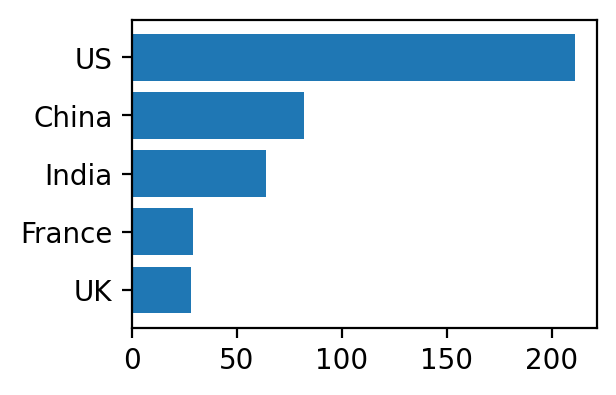

In [84]:
plt.figure(figsize=(3,2))
df['Country/ countries'].value_counts().nlargest(5).sort_values().plot(kind='barh', width=.8);

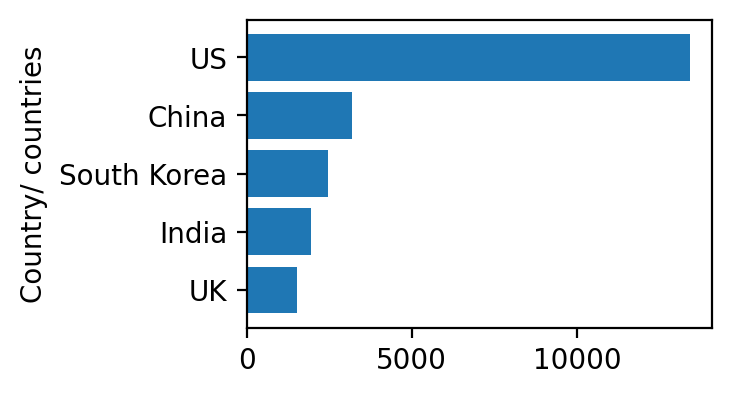

In [86]:
plt.figure(figsize=(3,2))
df.groupby('Country/ countries')['Valuation (US$ billions)'].sum().nlargest(5).sort_values().plot(kind='barh', width=.8);

## Clean currency text

In [87]:
pd.set_option('display.max_columns', 0, 
              'display.max_colwidth', 0)

df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/FIFA2018_modified/fifa2018player.csv')
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special
0,20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228
1,158023,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154
2,190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100
3,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291
4,167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493


In [88]:
df.rename(columns={'Value':'Value_EUR', 'Wage':'Wage_EUR'}, inplace=True)
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value_EUR,Wage_EUR,Special
0,20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228
1,158023,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154
2,190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100
3,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291
4,167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493


In [89]:
df['Value_EUR'].str[-1:][0:10]

0    M
1    M
2    M
3    M
4    M
5    M
6    M
7    M
8    M
9    M
Name: Value_EUR, dtype: object

In [90]:
df['Value_EUR'].str[-1:].unique()

array(['M', '0', 'K'], dtype=object)

In [91]:
def value_unit(s: str):
    s = s.strip().upper()
    if s[-1] == 'M':
        return 1e6
    elif s[-1] == 'K':
        return 1000
    else:
        return 1

In [92]:
value_unit('€95.5M')

1000000.0

In [93]:
import re # regular expression

def str_value(s: str):
    mul = value_unit(s)
    return float(re.sub(r'[^0-9.]', '', s)) * mul # regular expression substitute

In [95]:
str_value('€95.5M')

95500000.0

In [96]:
df[['Value_EUR', 'Wage_EUR']][:10]

,Value_EUR,Wage_EUR
0,€95.5M,€565K
1,€105M,€565K
2,€123M,€280K
3,€97M,€510K
4,€61M,€230K
5,€92M,€355K
6,€64.5M,€215K
7,€90.5M,€295K
8,€79M,€340K
9,€77M,€275K


In [97]:
df[['Value_EUR', 'Wage_EUR']].applymap(lambda s: str_value(s))[:10]

,Value_EUR,Wage_EUR
0,95500000.0,565000.0
1,105000000.0,565000.0
2,123000000.0,280000.0
3,97000000.0,510000.0
4,61000000.0,230000.0
5,92000000.0,355000.0
6,64500000.0,215000.0
7,90500000.0,295000.0
8,79000000.0,340000.0
9,77000000.0,275000.0


In [98]:
df[['Value_EUR', 'Wage_EUR']] = df[['Value_EUR', 'Wage_EUR']].applymap(lambda s: str_value(s))[:10]
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value_EUR,Wage_EUR,Special
0,20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,2228
1,158023,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,2154
2,190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,2100
3,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,2291
4,167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000000.0,230000.0,1493


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           17981 non-null  int64  
 1   Name         17981 non-null  object 
 2   Age          17981 non-null  int64  
 3   Nationality  17981 non-null  object 
 4   Overall      17981 non-null  int64  
 5   Potential    17981 non-null  int64  
 6   Club         17733 non-null  object 
 7   Value_EUR    10 non-null     float64
 8   Wage_EUR     10 non-null     float64
 9   Special      17981 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 1.4+ MB


In [100]:
df.nlargest(10, 'Value_EUR')

,ID,Name,Age,Nationality,Overall,Potential,Club,Value_EUR,Wage_EUR,Special
2,190871,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000.0,280000.0,2100
1,158023,L. Messi,30,Argentina,93,93,FC Barcelona,105000000.0,565000.0,2154
3,176580,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,2291
0,20801,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,2228
5,188545,R. Lewandowski,28,Poland,91,91,FC Bayern Munich,92000000.0,355000.0,2143
7,183277,E. Hazard,26,Belgium,90,91,Chelsea,90500000.0,295000.0,2096
8,182521,T. Kroos,27,Germany,90,90,Real Madrid CF,79000000.0,340000.0,2165
9,167664,G. Higuaín,29,Argentina,90,90,Juventus,77000000.0,275000.0,1961
6,193080,De Gea,26,Spain,90,92,Manchester United,64500000.0,215000.0,1458
4,167495,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000000.0,230000.0,1493


In [102]:
df.groupby('Club')[['Value_EUR', 'Wage_EUR']].sum().sort_values('Value_EUR', ascending=False).head(5)

,Value_EUR,Wage_EUR
Club,,
FC Barcelona,202000000.0,1075000.0
Real Madrid CF,174500000.0,905000.0
FC Bayern Munich,153000000.0,585000.0
Paris Saint-Germain,123000000.0,280000.0
Chelsea,90500000.0,295000.0


## str.extract & str.split

In [103]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/regexp_extract_split.csv')
df.head()

,title_year,length,budget_revenue
0,Toy Story (1995),1 hour(s) 21 minute(s),30.0/362.0
1,A Bug's Life (1998),1 hour(s) 36 minute(s),45.0/363.4
2,Toy Story 2 (1999),1 hour(s) 32 minute(s),90.0/485.0
3,"Monsters, Inc. (2001)",1 hour(s) 30 minute(s),115.0/528.8
4,Finding Nemo (2003),1 hour(s) 44 minute(s),94.0/895.6


In [104]:
df['title_year'].str.extract('(.{1,})\s\((\d{4})\)') # extract text to a new column
# df['title_year'].str.extract('(.+)\s\((\d{4})\)')

,0,1
0,Toy Story,1995
1,A Bug's Life,1998
2,Toy Story 2,1999
3,"Monsters, Inc.",2001
4,Finding Nemo,2003
5,The Incredibles,2004
6,Cars,2006
7,Ratatouille,2007
8,WALL-E,2008
9,Up,2009


In [105]:
dm = df['title_year'].str.extract('(.+)\s\((\d{4})\)')
dm.columns = ['title', 'year']
dm['year'] = dm['year'].astype(int)
dm

,title,year
0,Toy Story,1995
1,A Bug's Life,1998
2,Toy Story 2,1999
3,"Monsters, Inc.",2001
4,Finding Nemo,2003
5,The Incredibles,2004
6,Cars,2006
7,Ratatouille,2007
8,WALL-E,2008
9,Up,2009


In [106]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   15 non-null     object
 1   year    15 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 308.0+ bytes


In [107]:
df.head()

,title_year,length,budget_revenue
0,Toy Story (1995),1 hour(s) 21 minute(s),30.0/362.0
1,A Bug's Life (1998),1 hour(s) 36 minute(s),45.0/363.4
2,Toy Story 2 (1999),1 hour(s) 32 minute(s),90.0/485.0
3,"Monsters, Inc. (2001)",1 hour(s) 30 minute(s),115.0/528.8
4,Finding Nemo (2003),1 hour(s) 44 minute(s),94.0/895.6


In [110]:
dt = df['length'].str.extract('(\d+)\shour\(s\)\s(\d+)\sminute\(s\)').astype(float)
# dt = df['length'].str.extract('(\d+)\shour\(s\)\s(\d+)\sminute\(s\)').applymap(float)
dt.columns = ['hour', 'minute']
dt.head()

,hour,minute
0,1.0,21.0
1,1.0,36.0
2,1.0,32.0
3,1.0,30.0
4,1.0,44.0


In [111]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hour    15 non-null     float64
 1   minute  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [112]:
dt['total_min'] = dt['hour'] * 60 + dt['minute']
dt.head()

,hour,minute,total_min
0,1.0,21.0,81.0
1,1.0,36.0,96.0
2,1.0,32.0,92.0
3,1.0,30.0,90.0
4,1.0,44.0,104.0


In [113]:
df.head()

,title_year,length,budget_revenue
0,Toy Story (1995),1 hour(s) 21 minute(s),30.0/362.0
1,A Bug's Life (1998),1 hour(s) 36 minute(s),45.0/363.4
2,Toy Story 2 (1999),1 hour(s) 32 minute(s),90.0/485.0
3,"Monsters, Inc. (2001)",1 hour(s) 30 minute(s),115.0/528.8
4,Finding Nemo (2003),1 hour(s) 44 minute(s),94.0/895.6


In [114]:
ds = df['budget_revenue'].str.replace(',', '').str.split('/', expand=True).astype(float)
# ds = df['budget_revenue'].str.replace(',', '').str.extract('(.+)/(.+)').astype(float)
ds.columns = ['budget', 'revenue']
ds['profit'] = ds['revenue'] - ds['budget']
ds.head()

,budget,revenue,profit
0,30.0,362.0,332.0
1,45.0,363.4,318.4
2,90.0,485.0,395.0
3,115.0,528.8,413.8
4,94.0,895.6,801.6


In [115]:
df = pd.concat([df, dm, dt, ds], axis=1)
df.head()

,title_year,length,budget_revenue,title,year,hour,minute,total_min,budget,revenue,profit
0,Toy Story (1995),1 hour(s) 21 minute(s),30.0/362.0,Toy Story,1995,1.0,21.0,81.0,30.0,362.0,332.0
1,A Bug's Life (1998),1 hour(s) 36 minute(s),45.0/363.4,A Bug's Life,1998,1.0,36.0,96.0,45.0,363.4,318.4
2,Toy Story 2 (1999),1 hour(s) 32 minute(s),90.0/485.0,Toy Story 2,1999,1.0,32.0,92.0,90.0,485.0,395.0
3,"Monsters, Inc. (2001)",1 hour(s) 30 minute(s),115.0/528.8,"Monsters, Inc.",2001,1.0,30.0,90.0,115.0,528.8,413.8
4,Finding Nemo (2003),1 hour(s) 44 minute(s),94.0/895.6,Finding Nemo,2003,1.0,44.0,104.0,94.0,895.6,801.6


In [116]:
df[['total_min', 'budget', 'revenue', 'profit']].mean()

total_min    101.533333
budget       133.400000
revenue      612.486667
profit       479.086667
dtype: float64

# Lambda (Anonymous Function)

In [117]:
def cel2fah(c):
    return (c * (9/5)) + 32

In [118]:
cel2fah(100)

212.0

In [119]:
lambda c: (c * (9/5)) + 32 # automatic return value without define return

<function __main__.<lambda>(c)>

In [120]:
c2f = lambda c: (c * (9/5)) + 32

In [121]:
c2f(100)

212.0

In [122]:
t = [0, 10, 20, 30, 100]
f = map(lambda c: cel2fah(c), t) # able to apply function into lambda
# f = map(lambda c: (c * (9/5)) + 32, t)
list(f)

[32.0, 50.0, 68.0, 86.0, 212.0]

In [125]:
rectangle = lambda w, h: w * h
rectangle(5, 10)

50

In [126]:
df = pd.DataFrame({'celsius':t})
df

,celsius
0,0
1,10
2,20
3,30
4,100


In [127]:
df['celsius'] * 9/5 + 32

0    32.0 
1    50.0 
2    68.0 
3    86.0 
4    212.0
Name: celsius, dtype: float64

In [128]:
df['celsius'].map(lambda c: c * 9/5 + 32)

0    32.0 
1    50.0 
2    68.0 
3    86.0 
4    212.0
Name: celsius, dtype: float64

In [129]:
df['celsius'].apply(lambda c: c * 9/5 + 32)

0    32.0 
1    50.0 
2    68.0 
3    86.0 
4    212.0
Name: celsius, dtype: float64

In [130]:
%timeit -n1000 df['celsius'] * 9/5 + 32

290 µs ± 79.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [131]:
%timeit -n1000 df['celsius'].map(lambda c: c * 9/5 + 32) # run code with lambda is faster 3x than normal operation!!!

69.5 µs ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [132]:
%timeit -n1000 df['celsius'].apply(lambda c: c * 9/5 + 32) # apply is slower than map!!

184 µs ± 44.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [133]:
df['fah'] = df['celsius'].map(lambda c: c * 9/5 + 32)
df

,celsius,fah
0,0,32.0
1,10,50.0
2,20,68.0
3,30,86.0
4,100,212.0


In [134]:
df = pd.read_table('https://raw.githubusercontent.com/prasertcbs/tutorial/master/applicant.tsv')
df.head()

,applicantID,eng,math,interview
0,A432,91,97,83
1,C747,94,94,58
2,C751,74,55,89
3,B716,63,89,93
4,A623,90,73,81


In [135]:
df['eng'].map(lambda s: 'pass' if s >= 80 else 'fail') # map work with one series!

0    pass
1    pass
2    fail
3    fail
4    pass
5    fail
6    pass
7    fail
8    fail
9    pass
Name: eng, dtype: object

In [136]:
df.apply(lambda s: 'pass' if s.eng >= 80 and s.math >= 75 else 'fail', axis =1) # apply work with multiple columns!

0    pass
1    pass
2    fail
3    fail
4    fail
5    fail
6    pass
7    fail
8    fail
9    pass
dtype: object

In [137]:
df['eng_math'] = df.apply(lambda s: 'pass' if s.eng >= 80 and s.math >= 75 else 'fail', axis =1)
df.head()

,applicantID,eng,math,interview,eng_math
0,A432,91,97,83,pass
1,C747,94,94,58,pass
2,C751,74,55,89,fail
3,B716,63,89,93,fail
4,A623,90,73,81,fail


In [139]:
df['qualify'] = df.apply(lambda s: 'pass' if s.eng >= 80 and s.math >= 75 and s.interview > 60 else 'fail', axis =1)
df.head()

,applicantID,eng,math,interview,eng_math,qualify
0,A432,91,97,83,pass,pass
1,C747,94,94,58,pass,fail
2,C751,74,55,89,fail,fail
3,B716,63,89,93,fail,fail
4,A623,90,73,81,fail,fail


In [140]:
df['score'] = df.apply(lambda s: s.eng * .5 + s.math * .3 + s.interview * .2, axis=1)
df.head()

,applicantID,eng,math,interview,eng_math,qualify,score
0,A432,91,97,83,pass,pass,91.2
1,C747,94,94,58,pass,fail,86.8
2,C751,74,55,89,fail,fail,71.3
3,B716,63,89,93,fail,fail,76.8
4,A623,90,73,81,fail,fail,83.1


In [141]:
%timeit -n1000 df.apply(lambda s: s.eng * .5 + s.math * .3 + s.interview * .2, axis=1)

787 µs ± 76.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [142]:
%timeit -n1000 df.eng * .5 + df.math * .3 + df.interview * .2 # normal operation is faster than apply!!!

495 µs ± 41 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [143]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/gem.txt', names=['text'])
df.head()

,text
0,Amber (แอมเบอร์) = อำพัน
1,Amethyst (แอมมิธิสท์) = พลอยสีม่วง
2,Crystal (คริสทัล) = คริสตัล
3,Diamond (ไดมอนด์) = เพชร
4,Emerald (เอมเมอเริลด์) = มรกต


In [145]:
df['text'].str.extract('(\w+)').head()

,0
0,Amber
1,Amethyst
2,Crystal
3,Diamond
4,Emerald


In [146]:
df['text'].str.extract(r'([\u0E00-\u0E7F]+)').head() # Thai unicode

,0
0,แอมเบอร์
1,แอมมิธิสท์
2,คริสทัล
3,ไดมอนด์
4,เอมเมอเริลด์


In [147]:
df['text'].str.extract(r'([\u0E00-\u0E7F]+$)').head() # Thai unicode

,0
0,อำพัน
1,พลอยสีม่วง
2,คริสตัล
3,เพชร
4,มรกต


In [148]:
df.head()

,text
0,Amber (แอมเบอร์) = อำพัน
1,Amethyst (แอมมิธิสท์) = พลอยสีม่วง
2,Crystal (คริสทัล) = คริสตัล
3,Diamond (ไดมอนด์) = เพชร
4,Emerald (เอมเมอเริลด์) = มรกต


In [149]:
dt = df['text'].str.extract(r'(\w+)\s+\(([\u0E00-\u0E7F]+)\)\s+\=\s+([\u0E00-\u0E7F]+)')
dt.columns = ['en', 'pron', 'th']
dt.head()

,en,pron,th
0,Amber,แอมเบอร์,อำพัน
1,Amethyst,แอมมิธิสท์,พลอยสีม่วง
2,Crystal,คริสทัล,คริสตัล
3,Diamond,ไดมอนด์,เพชร
4,Emerald,เอมเมอเริลด์,มรกต


In [151]:
dt = df['text'].str.extract(r'(?P<en>\w+)\s+\((?P<pron>[\u0E00-\u0E7F]+)\)\s+\=\s+(?P<th>[\u0E00-\u0E7F]+)') # named columns by regex
dt.head()

,en,pron,th
0,Amber,แอมเบอร์,อำพัน
1,Amethyst,แอมมิธิสท์,พลอยสีม่วง
2,Crystal,คริสทัล,คริสตัล
3,Diamond,ไดมอนด์,เพชร
4,Emerald,เอมเมอเริลด์,มรกต


In [153]:
dt = df['text'].str.extract(r'(\w+)\s+\((\D+)\)\s+\=\s+(\D+)') # \D is NOT a number
dt.columns = ['en', 'pron', 'th']
dt.head()

,en,pron,th
0,Amber,แอมเบอร์,อำพัน
1,Amethyst,แอมมิธิสท์,พลอยสีม่วง
2,Crystal,คริสทัล,คริสตัล
3,Diamond,ไดมอนด์,เพชร
4,Emerald,เอมเมอเริลด์,มรกต


# Map

In [154]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/mpg.csv')
df = df.sample(10).reset_index(drop=True)
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
1,dodge,dakota pickup 4wd,5.2,1999,8,manual(m5),4,11,17,r,pickup
2,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater
3,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,volkswagen,jetta,2.8,1999,6,manual(m5),f,17,24,r,compact
6,toyota,4runner 4wd,4.7,2008,8,auto(l5),4,14,17,r,suv
7,toyota,corolla,1.8,1999,4,auto(l4),f,24,33,r,compact
8,subaru,impreza awd,2.5,2008,4,auto(s4),4,20,27,r,compact
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


In [155]:
df['manufacturer'].str.capitalize()

0    Volkswagen
1    Dodge     
2    Chevrolet 
3    Audi      
4    Audi      
5    Volkswagen
6    Toyota    
7    Toyota    
8    Subaru    
9    Audi      
Name: manufacturer, dtype: object

In [156]:
df['trans_am'] = df['trans'].map(lambda v: 'Auto' if v[0] == 'a' else 'Manual').astype('category') # lambda method
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,trans_am
0,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,Manual
1,dodge,dakota pickup 4wd,5.2,1999,8,manual(m5),4,11,17,r,pickup,Manual
2,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,Manual
3,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,Manual
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,Auto
5,volkswagen,jetta,2.8,1999,6,manual(m5),f,17,24,r,compact,Manual
6,toyota,4runner 4wd,4.7,2008,8,auto(l5),4,14,17,r,suv,Auto
7,toyota,corolla,1.8,1999,4,auto(l4),f,24,33,r,compact,Auto
8,subaru,impreza awd,2.5,2008,4,auto(s4),4,20,27,r,compact,Auto
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,Auto


In [157]:
def am(v):
    if v[0] == 'a':
        return 'Auto'
    else:
        return 'Manual'
    
df['trans'].map(am) # function method

0    Manual
1    Manual
2    Manual
3    Manual
4    Auto  
5    Manual
6    Auto  
7    Auto  
8    Auto  
9    Auto  
Name: trans, dtype: object

In [158]:
df['drv2'] = df['drv'].map({'f':'front', 'r':'rear', '4':'4-wheel'}).astype('category')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,trans_am,drv2
0,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,Manual,front
1,dodge,dakota pickup 4wd,5.2,1999,8,manual(m5),4,11,17,r,pickup,Manual,4-wheel
2,chevrolet,corvette,6.2,2008,8,manual(m6),r,16,26,p,2seater,Manual,rear
3,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,Manual,4-wheel
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,Auto,front
5,volkswagen,jetta,2.8,1999,6,manual(m5),f,17,24,r,compact,Manual,front
6,toyota,4runner 4wd,4.7,2008,8,auto(l5),4,14,17,r,suv,Auto,4-wheel
7,toyota,corolla,1.8,1999,4,auto(l4),f,24,33,r,compact,Auto,front
8,subaru,impreza awd,2.5,2008,4,auto(s4),4,20,27,r,compact,Auto,4-wheel
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,Auto,4-wheel


# Apply

In [159]:
df = pd.read_table('https://raw.githubusercontent.com/prasertcbs/tutorial/master/currency.tsv', index_col='Year')
df

,TV,Camera,Phone
Year,,,
2011,"THB556,300","THB943,620","THB518,600"
2012,"THB344,200","THB583,370","THB323,920"
2013,"THB727,320","THB548,640","THB941,500"
2014,"THB462,870","THB661,520","THB650,570"
2015,"THB916,600","THB974,180","THB148,740"
2016,"THB176,830","THB588,990","THB910,570"
2017,"THB745,550","THB896,860","THB982,820"


In [161]:
df['TV'].str.replace('\D', '', regex=True).astype(int) # \D is NOT a number

Year
2011    556300
2012    344200
2013    727320
2014    462870
2015    916600
2016    176830
2017    745550
Name: TV, dtype: int32

In [162]:
import re

def remove_nondigit(v):
    return int(re.sub(r'\D', '', v))

In [163]:
remove_nondigit('usd123,000')

123000

In [164]:
df2 = df.applymap(remove_nondigit)
df2

,TV,Camera,Phone
Year,,,
2011,556300,943620,518600
2012,344200,583370,323920
2013,727320,548640,941500
2014,462870,661520,650570
2015,916600,974180,148740
2016,176830,588990,910570
2017,745550,896860,982820


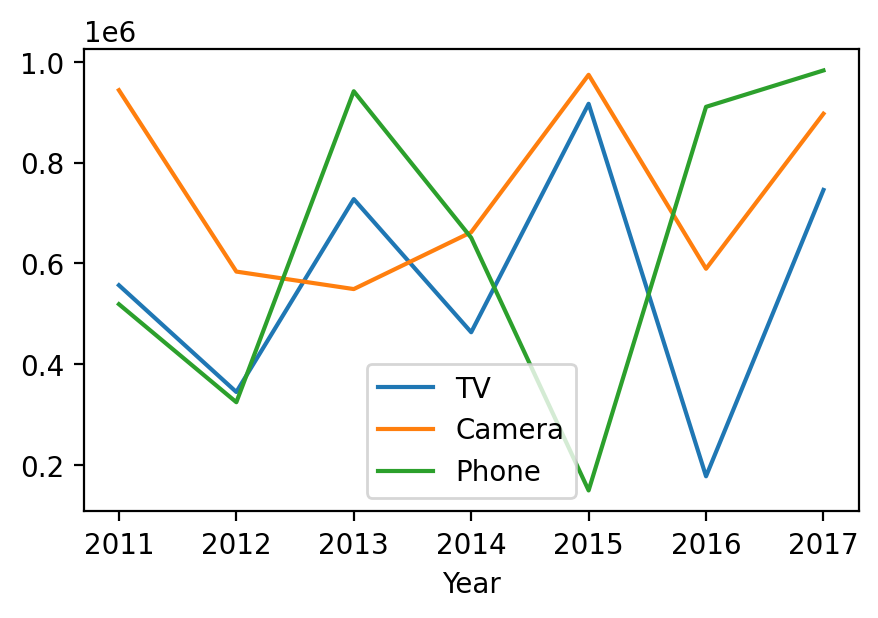

In [170]:
df2.plot(figsize=(5,3));

In [168]:
df.applymap(lambda v: int(re.sub(r'\D', '', v)))

,TV,Camera,Phone
Year,,,
2011,556300,943620,518600
2012,344200,583370,323920
2013,727320,548640,941500
2014,462870,661520,650570
2015,916600,974180,148740
2016,176830,588990,910570
2017,745550,896860,982820


In [171]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/mpg.csv')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [172]:
df[['manufacturer', 'model', 'class']] = df[['manufacturer', 'model', 'class']].applymap(str.capitalize)
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,Audi,A4,1.8,1999,4,auto(l5),f,18,29,p,Compact
1,Audi,A4,1.8,1999,4,manual(m5),f,21,29,p,Compact
2,Audi,A4,2.0,2008,4,manual(m6),f,20,31,p,Compact
3,Audi,A4,2.0,2008,4,auto(av),f,21,30,p,Compact
4,Audi,A4,2.8,1999,6,auto(l5),f,16,26,p,Compact


In [173]:
df = pd.read_table('https://raw.githubusercontent.com/prasertcbs/tutorial/master/sales.tsv', index_col='Year')
df

,TV,Camera,Phone
Year,,,
2011,556300,943620,518600
2012,344200,583370,323920
2013,727320,548640,941500
2014,462870,661520,650570
2015,916600,974180,148740
2016,176830,588990,910570
2017,745550,896860,982820


In [174]:
df.apply(np.sum) # axis=0 default
# df.apply(np.sum, axis='index')

TV        3929670
Camera    5197180
Phone     4476720
dtype: int64

In [175]:
df.apply(np.sum, axis=1)
# df.apply(np.sum, axis='columns')

Year
2011    2018520
2012    1251490
2013    2217460
2014    1774960
2015    2039520
2016    1676390
2017    2625230
dtype: int64

In [176]:
from scipy import stats

df.apply(stats.hmean) # hormonic mean

TV        428773.063662
Camera    703686.417471
Phone     425440.529110
dtype: float64

In [177]:
df.apply(stats.hmean, axis=1) # hormonic mean

Year
2011    626879.558570
2012    389274.318996
2013    704269.269335
2014    575902.233035
2015    339342.184959
2016    354979.850179
2017    863614.238880
dtype: float64

In [178]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/mpg.csv')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [179]:
df['manufacturer'].map(str.upper)[:10] # map work with Series

0    AUDI
1    AUDI
2    AUDI
3    AUDI
4    AUDI
5    AUDI
6    AUDI
7    AUDI
8    AUDI
9    AUDI
Name: manufacturer, dtype: object

In [180]:
df[['manufacturer', 'model', 'class']].apply(lambda s: s.str.upper()).head() # apply work with DataFrame

,manufacturer,model,class
0,AUDI,A4,COMPACT
1,AUDI,A4,COMPACT
2,AUDI,A4,COMPACT
3,AUDI,A4,COMPACT
4,AUDI,A4,COMPACT


In [181]:
df.apply(lambda d: f"{d.manufacturer} ({d.model}) {d.trans}", axis=1)[:10]
# df.apply(lambda d: f"{d['manufacturer']} ({d['model']})", axis=1)

0    audi (a4) auto(l5)          
1    audi (a4) manual(m5)        
2    audi (a4) manual(m6)        
3    audi (a4) auto(av)          
4    audi (a4) auto(l5)          
5    audi (a4) manual(m5)        
6    audi (a4) auto(av)          
7    audi (a4 quattro) manual(m5)
8    audi (a4 quattro) auto(l5)  
9    audi (a4 quattro) manual(m6)
dtype: object

In [182]:
df['kml'] = df.apply(lambda d: f"{d.cty * 0.425143707:4.1f}/{d.hwy * 0.425143707:4.1f}", axis=1)
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,kml
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,7.7/12.3
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8.9/12.3
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,8.5/13.2
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,8.9/12.8
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,6.8/11.1


In [184]:
df.mean(numeric_only=True)

displ    3.471795   
year     2003.500000
cyl      5.888889   
cty      16.858974  
hwy      23.440171  
dtype: float64

In [185]:
df.select_dtypes(include=[np.number]).drop('year', axis=1).apply(stats.hmean) # select only column type that is a number

displ    3.014710 
cyl      5.446082 
cty      15.848635
hwy      21.914100
dtype: float64

# Category

In [187]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/gapminder.csv')
df.head()

,country,year,continent,lifeExp,pop,gdpPercap
0,Afghanistan,1952,Asia,28.801,8425333,779.445314
1,Afghanistan,1957,Asia,30.332,9240934,820.853030
2,Afghanistan,1962,Asia,31.997,10267083,853.100710
3,Afghanistan,1967,Asia,34.020,11537966,836.197138
4,Afghanistan,1972,Asia,36.088,13079460,739.981106


In [188]:
df.shape

(1704, 6)

In [189]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   continent  1704 non-null   object 
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 266.8 KB


In [190]:
df.memory_usage(deep=True)

Index        128   
country      111360
year         13632 
continent    107184
lifeExp      13632 
pop          13632 
gdpPercap    13632 
dtype: int64

In [191]:
df['country_cat'] = df['country'].astype('category')
df['continent2'] = df['continent'].astype('category')
df.head()

,country,year,continent,lifeExp,pop,gdpPercap,country_cat,continent2
0,Afghanistan,1952,Asia,28.801,8425333,779.445314,Afghanistan,Asia
1,Afghanistan,1957,Asia,30.332,9240934,820.853030,Afghanistan,Asia
2,Afghanistan,1962,Asia,31.997,10267083,853.100710,Afghanistan,Asia
3,Afghanistan,1967,Asia,34.020,11537966,836.197138,Afghanistan,Asia
4,Afghanistan,1972,Asia,36.088,13079460,739.981106,Afghanistan,Asia


In [192]:
df.memory_usage(deep=True) # changing data type helps a file save memory too much!!!

Index          128   
country        111360
year           13632 
continent      107184
lifeExp        13632 
pop            13632 
gdpPercap      13632 
country_cat    16856 
continent2     2192  
dtype: int64

In [193]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/gapminder.csv', dtype={'country':'category', 'continent':'category'})
df.head()

,country,year,continent,lifeExp,pop,gdpPercap
0,Afghanistan,1952,Asia,28.801,8425333,779.445314
1,Afghanistan,1957,Asia,30.332,9240934,820.853030
2,Afghanistan,1962,Asia,31.997,10267083,853.100710
3,Afghanistan,1967,Asia,34.020,11537966,836.197138
4,Afghanistan,1972,Asia,36.088,13079460,739.981106


In [194]:
df.info() # memory usage obviously reduced!!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   country    1704 non-null   category
 1   year       1704 non-null   int64   
 2   continent  1704 non-null   category
 3   lifeExp    1704 non-null   float64 
 4   pop        1704 non-null   int64   
 5   gdpPercap  1704 non-null   float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 59.7 KB


In [195]:
df['continent'].cat.categories

Index(['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'], dtype='object')

In [200]:
df['continent_code'] = df['continent'].cat.codes # it is contained in int which is less byte than string
df[['continent', 'continent_code']].sample(5)

,continent,continent_code
1029,Africa,0
648,Americas,1
1216,Asia,2
590,Europe,3
995,Americas,1


In [201]:
pd.get_dummies(df['continent'])[:10] # it is easy to get dummy variable by changing data type to category!

,Africa,Americas,Asia,Europe,Oceania
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,1,0,0
7,0,0,1,0,0
8,0,0,1,0,0
9,0,0,1,0,0


In [202]:
pd.concat([df, pd.get_dummies(df.continent)], axis=1).head()

,country,year,continent,lifeExp,pop,gdpPercap,continent_code,Africa,Americas,Asia,Europe,Oceania
0,Afghanistan,1952,Asia,28.801,8425333,779.445314,2,0,0,1,0,0
1,Afghanistan,1957,Asia,30.332,9240934,820.853030,2,0,0,1,0,0
2,Afghanistan,1962,Asia,31.997,10267083,853.100710,2,0,0,1,0,0
3,Afghanistan,1967,Asia,34.020,11537966,836.197138,2,0,0,1,0,0
4,Afghanistan,1972,Asia,36.088,13079460,739.981106,2,0,0,1,0,0


## Ordered Category

In [203]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/staff.csv', index_col='empID')
df.head()

,fname,lname,sex,dob,position,department,salary,join_date
empID,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,5-Mar-1994,ผู้จัดการ,HR,"13,000",28-Feb-2016
607,เกศินี,สายหยุด,F,6-Dec-1968,ผู้ช่วยผู้จัดการ,FIN,"40,000",30-Nov-1987
486,ชัชลัญญา,ลั่นทม,F,1-Jun-1987,ผู้ช่วยผู้จัดการ,FIN,"25,000",26-May-2009
229,ชาติไทย,เสี้ยวดอกแดง,M,27-Jul-1991,พนักงานระดับต้น,MKT,"39,000",21-Jul-2015
901,โชติมา,อรคนธ์,F,21-Aug-1974,รองผู้จัดการ,MKT,"82,500",18-Sep-2007


In [204]:
df['position'].unique()

array(['ผู้จัดการ', 'ผู้ช่วยผู้จัดการ', 'พนักงานระดับต้น', 'รองผู้จัดการ',
       'ผู้ชำนาญงาน'], dtype=object)

In [205]:
df.sort_values('position')

,fname,lname,sex,dob,position,department,salary,join_date
empID,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,5-Mar-1994,ผู้จัดการ,HR,"13,000",28-Feb-2016
41,ณัฐญาณิน,มะลิลา,F,11-Feb-1987,ผู้จัดการ,MKT,"36,000",5-Feb-2012
51,ณิรดา,คัดเค้าเครือ,F,27-Apr-1972,ผู้จัดการ,MKT,"101,500",29-Oct-2001
665,ณัชชา,สนสร้อย,F,17-Jun-1983,ผู้ชำนาญงาน,ACC,"21,000",11-Mar-2017
607,เกศินี,สายหยุด,F,6-Dec-1968,ผู้ช่วยผู้จัดการ,FIN,"40,000",30-Nov-1987
486,ชัชลัญญา,ลั่นทม,F,1-Jun-1987,ผู้ช่วยผู้จัดการ,FIN,"25,000",26-May-2009
724,เดชชัย,พุทธชาติสามสี,M,13-May-1983,ผู้ช่วยผู้จัดการ,MKT,"77,500",8-Mar-2004
229,ชาติไทย,เสี้ยวดอกแดง,M,27-Jul-1991,พนักงานระดับต้น,MKT,"39,000",21-Jul-2015
944,ฐิติรัตน์,ตันหยง,F,15-Aug-1975,พนักงานระดับต้น,HR,"38,000",9-Aug-1996


In [206]:
from pandas.api.types import CategoricalDtype

cat_dtype = CategoricalDtype(categories=['ผู้จัดการ', 'รองผู้จัดการ', 'ผู้ช่วยผู้จัดการ', 'ผู้ชำนาญงาน', 'พนักงานระดับต้น'], ordered=True)

df['position_cat'] = df['position'].astype(cat_dtype)
df

,fname,lname,sex,dob,position,department,salary,join_date,position_cat
empID,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,5-Mar-1994,ผู้จัดการ,HR,"13,000",28-Feb-2016,ผู้จัดการ
607,เกศินี,สายหยุด,F,6-Dec-1968,ผู้ช่วยผู้จัดการ,FIN,"40,000",30-Nov-1987,ผู้ช่วยผู้จัดการ
486,ชัชลัญญา,ลั่นทม,F,1-Jun-1987,ผู้ช่วยผู้จัดการ,FIN,"25,000",26-May-2009,ผู้ช่วยผู้จัดการ
229,ชาติไทย,เสี้ยวดอกแดง,M,27-Jul-1991,พนักงานระดับต้น,MKT,"39,000",21-Jul-2015,พนักงานระดับต้น
901,โชติมา,อรคนธ์,F,21-Aug-1974,รองผู้จัดการ,MKT,"82,500",18-Sep-2007,รองผู้จัดการ
944,ฐิติรัตน์,ตันหยง,F,15-Aug-1975,พนักงานระดับต้น,HR,"38,000",9-Aug-1996,พนักงานระดับต้น
405,ณภัทร,มณฑา,M,8-Nov-1963,พนักงานระดับต้น,FIN,"35,000",2-Nov-1984,พนักงานระดับต้น
665,ณัชชา,สนสร้อย,F,17-Jun-1983,ผู้ชำนาญงาน,ACC,"21,000",11-Mar-2017,ผู้ชำนาญงาน
41,ณัฐญาณิน,มะลิลา,F,11-Feb-1987,ผู้จัดการ,MKT,"36,000",5-Feb-2012,ผู้จัดการ


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 604 to 724
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   fname         12 non-null     object  
 1   lname         12 non-null     object  
 2   sex           12 non-null     object  
 3   dob           12 non-null     object  
 4   position      12 non-null     object  
 5   department    12 non-null     object  
 6   salary        12 non-null     object  
 7   join_date     12 non-null     object  
 8   position_cat  12 non-null     category
dtypes: category(1), object(8)
memory usage: 1.1+ KB


In [208]:
df.sort_values('position_cat')

,fname,lname,sex,dob,position,department,salary,join_date,position_cat
empID,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,5-Mar-1994,ผู้จัดการ,HR,"13,000",28-Feb-2016,ผู้จัดการ
41,ณัฐญาณิน,มะลิลา,F,11-Feb-1987,ผู้จัดการ,MKT,"36,000",5-Feb-2012,ผู้จัดการ
51,ณิรดา,คัดเค้าเครือ,F,27-Apr-1972,ผู้จัดการ,MKT,"101,500",29-Oct-2001,ผู้จัดการ
901,โชติมา,อรคนธ์,F,21-Aug-1974,รองผู้จัดการ,MKT,"82,500",18-Sep-2007,รองผู้จัดการ
607,เกศินี,สายหยุด,F,6-Dec-1968,ผู้ช่วยผู้จัดการ,FIN,"40,000",30-Nov-1987,ผู้ช่วยผู้จัดการ
486,ชัชลัญญา,ลั่นทม,F,1-Jun-1987,ผู้ช่วยผู้จัดการ,FIN,"25,000",26-May-2009,ผู้ช่วยผู้จัดการ
724,เดชชัย,พุทธชาติสามสี,M,13-May-1983,ผู้ช่วยผู้จัดการ,MKT,"77,500",8-Mar-2004,ผู้ช่วยผู้จัดการ
665,ณัชชา,สนสร้อย,F,17-Jun-1983,ผู้ชำนาญงาน,ACC,"21,000",11-Mar-2017,ผู้ชำนาญงาน
229,ชาติไทย,เสี้ยวดอกแดง,M,27-Jul-1991,พนักงานระดับต้น,MKT,"39,000",21-Jul-2015,พนักงานระดับต้น


In [209]:
df['position_cat']

empID
604    ผู้จัดการ       
607    ผู้ช่วยผู้จัดการ
486    ผู้ช่วยผู้จัดการ
229    พนักงานระดับต้น 
901    รองผู้จัดการ    
944    พนักงานระดับต้น 
405    พนักงานระดับต้น 
665    ผู้ชำนาญงาน     
41     ผู้จัดการ       
171    พนักงานระดับต้น 
51     ผู้จัดการ       
724    ผู้ช่วยผู้จัดการ
Name: position_cat, dtype: category
Categories (5, object): ['ผู้จัดการ' < 'รองผู้จัดการ' < 'ผู้ช่วยผู้จัดการ' < 'ผู้ชำนาญงาน' < 'พนักงานระดับต้น']

In [210]:
df['position_cat_codes'] = df['position_cat'].cat.codes
df

,fname,lname,sex,dob,position,department,salary,join_date,position_cat,position_cat_codes
empID,,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,5-Mar-1994,ผู้จัดการ,HR,"13,000",28-Feb-2016,ผู้จัดการ,0
607,เกศินี,สายหยุด,F,6-Dec-1968,ผู้ช่วยผู้จัดการ,FIN,"40,000",30-Nov-1987,ผู้ช่วยผู้จัดการ,2
486,ชัชลัญญา,ลั่นทม,F,1-Jun-1987,ผู้ช่วยผู้จัดการ,FIN,"25,000",26-May-2009,ผู้ช่วยผู้จัดการ,2
229,ชาติไทย,เสี้ยวดอกแดง,M,27-Jul-1991,พนักงานระดับต้น,MKT,"39,000",21-Jul-2015,พนักงานระดับต้น,4
901,โชติมา,อรคนธ์,F,21-Aug-1974,รองผู้จัดการ,MKT,"82,500",18-Sep-2007,รองผู้จัดการ,1
944,ฐิติรัตน์,ตันหยง,F,15-Aug-1975,พนักงานระดับต้น,HR,"38,000",9-Aug-1996,พนักงานระดับต้น,4
405,ณภัทร,มณฑา,M,8-Nov-1963,พนักงานระดับต้น,FIN,"35,000",2-Nov-1984,พนักงานระดับต้น,4
665,ณัชชา,สนสร้อย,F,17-Jun-1983,ผู้ชำนาญงาน,ACC,"21,000",11-Mar-2017,ผู้ชำนาญงาน,3
41,ณัฐญาณิน,มะลิลา,F,11-Feb-1987,ผู้จัดการ,MKT,"36,000",5-Feb-2012,ผู้จัดการ,0


In [211]:
df.pivot_table(index='position', columns='sex', values='fname', aggfunc='count') # Not ordered by position!

sex,F,M
position,,
ผู้จัดการ,2.0,1.0
ผู้ชำนาญงาน,1.0,NaN
ผู้ช่วยผู้จัดการ,2.0,1.0
พนักงานระดับต้น,2.0,2.0
รองผู้จัดการ,1.0,NaN


In [212]:
df.pivot_table(index='position_cat', columns='sex', values='fname', aggfunc='count') # Ordered by position!!

sex,F,M
position_cat,,
ผู้จัดการ,2,1
รองผู้จัดการ,1,0
ผู้ช่วยผู้จัดการ,2,1
ผู้ชำนาญงาน,1,0
พนักงานระดับต้น,2,2


## Cut (Binning)

In [213]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/tutorial/master/staff.csv', 
                 index_col='empID', 
                 thousands=',', 
                 parse_dates=['dob', 'join_date'])
df.head()

,fname,lname,sex,dob,position,department,salary,join_date
empID,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 604 to 724
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   fname       12 non-null     object        
 1   lname       12 non-null     object        
 2   sex         12 non-null     object        
 3   dob         12 non-null     datetime64[ns]
 4   position    12 non-null     object        
 5   department  12 non-null     object        
 6   salary      12 non-null     int64         
 7   join_date   12 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 864.0+ bytes


In [215]:
from pandas.api.types import CategoricalDtype

salary_bucket = ['0-15,000', '15,001-30,000','30,001-50,000','50,001-80,000','80,000+']
cat_dtype = CategoricalDtype(categories=salary_bucket, ordered=True)

df['salary_group'] = pd.cut(df['salary'],
                            bins=[0, 15000, 30000, 50000, 80000, np.inf],
                            labels=salary_bucket,
                            right=True).astype(cat_dtype)
df

,fname,lname,sex,dob,position,department,salary,join_date,salary_group
empID,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,"0-15,000"
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,"30,001-50,000"
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,"15,001-30,000"
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,"30,001-50,000"
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18,"80,000+"
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,"30,001-50,000"
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,"30,001-50,000"
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,"15,001-30,000"
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,"30,001-50,000"


In [216]:
df['salary_group']

empID
604    0-15,000     
607    30,001-50,000
486    15,001-30,000
229    30,001-50,000
901    80,000+      
944    30,001-50,000
405    30,001-50,000
665    15,001-30,000
41     30,001-50,000
171    15,001-30,000
51     80,000+      
724    50,001-80,000
Name: salary_group, dtype: category
Categories (5, object): ['0-15,000' < '15,001-30,000' < '30,001-50,000' < '50,001-80,000' < '80,000+']

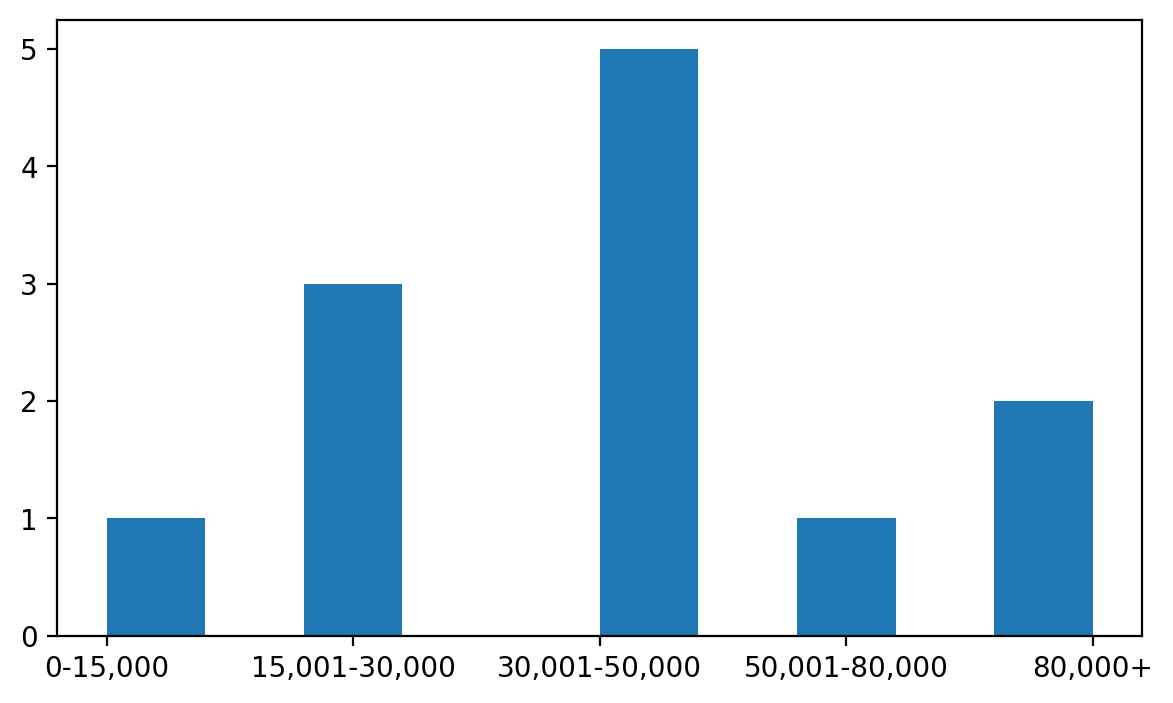

In [224]:
(df.sort_values('salary_group'))['salary_group'].hist(figsize=(7,4), grid=False);

In [225]:
df['age'] = pd.to_datetime('today').year - df['dob'].dt.year
df

,fname,lname,sex,dob,position,department,salary,join_date,salary_group,age
empID,,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,"0-15,000",29
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,"30,001-50,000",55
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,"15,001-30,000",36
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,"30,001-50,000",32
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18,"80,000+",49
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,"30,001-50,000",48
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,"30,001-50,000",60
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,"15,001-30,000",40
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,"30,001-50,000",36


In [226]:
age_cat = ['18-25', '26-30', '31-40', '41-50', '50+']
cat_dtype = CategoricalDtype(categories=age_cat, ordered=True)

df['age_group'] = pd.cut(df['age'],
                            bins=[18, 25, 30, 40, 50, np.inf],
                            labels=age_cat,
                            right=True).astype(cat_dtype)
df

,fname,lname,sex,dob,position,department,salary,join_date,salary_group,age,age_group
empID,,,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,"0-15,000",29,26-30
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,"30,001-50,000",55,50+
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,"15,001-30,000",36,31-40
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,"30,001-50,000",32,31-40
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18,"80,000+",49,41-50
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,"30,001-50,000",48,41-50
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,"30,001-50,000",60,50+
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,"15,001-30,000",40,31-40
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,"30,001-50,000",36,31-40


In [227]:
df['age_group']

empID
604    26-30
607    50+  
486    31-40
229    31-40
901    41-50
944    41-50
405    50+  
665    31-40
41     31-40
171    50+  
51     50+  
724    31-40
Name: age_group, dtype: category
Categories (5, object): ['18-25' < '26-30' < '31-40' < '41-50' < '50+']

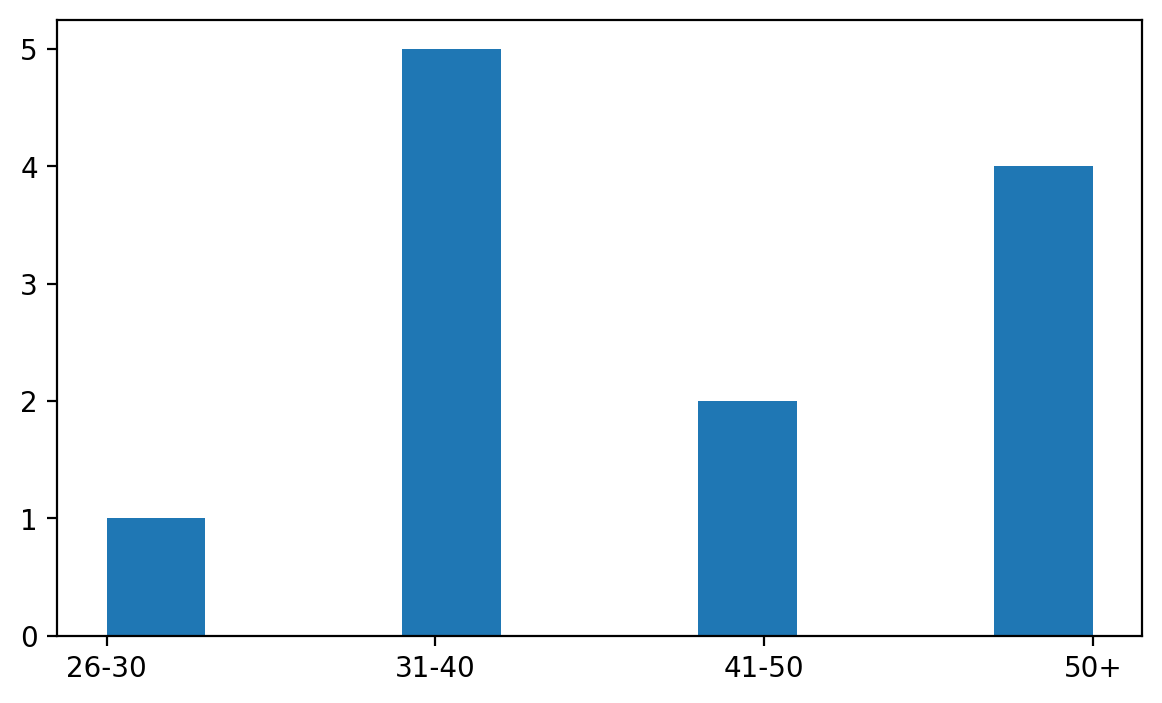

In [228]:
(df.sort_values('age_group'))['age_group'].hist(figsize=(7,4), grid=False);

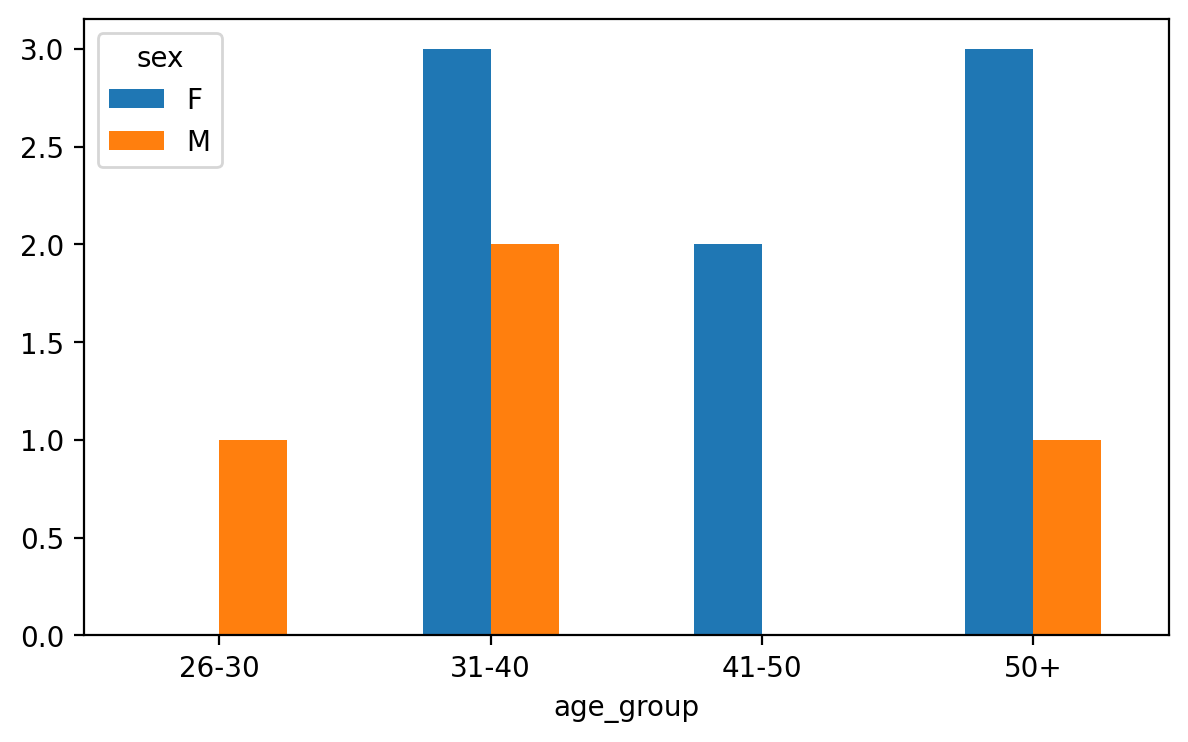

In [229]:
pd.crosstab(df['age_group'], df['sex']).plot(figsize=(7,4), kind='bar')
plt.xticks(rotation=0);

In [230]:
def gen(birthdate):
    y = birthdate.year
    if 1946 <= y <= 1964:
        return 'Baby Boomer'
    elif 1965 <= y <= 1979:
        return 'Gen X'
    elif 1980 <= y <= 1994:
        return 'Gen Y'
    elif 1995 <= y <= 2012:
        return 'Gen Z'
    else:
        return 'Gen Alpha'

In [231]:
cat_dtype = ['Baby Boomer', 'Gen X', 'Gen Y', 'Gen Z', 'Gen Alpha']

df['gen'] = df['dob'].map(lambda d: gen(d)).astype(CategoricalDtype(categories=cat_dtype, ordered=True))
df

,fname,lname,sex,dob,position,department,salary,join_date,salary_group,age,age_group,gen
empID,,,,,,,,,,,,
604,กันตภณ,ซ่อนกลิ่น,M,1994-03-05,ผู้จัดการ,HR,13000,2016-02-28,"0-15,000",29,26-30,Gen Y
607,เกศินี,สายหยุด,F,1968-12-06,ผู้ช่วยผู้จัดการ,FIN,40000,1987-11-30,"30,001-50,000",55,50+,Gen X
486,ชัชลัญญา,ลั่นทม,F,1987-06-01,ผู้ช่วยผู้จัดการ,FIN,25000,2009-05-26,"15,001-30,000",36,31-40,Gen Y
229,ชาติไทย,เสี้ยวดอกแดง,M,1991-07-27,พนักงานระดับต้น,MKT,39000,2015-07-21,"30,001-50,000",32,31-40,Gen Y
901,โชติมา,อรคนธ์,F,1974-08-21,รองผู้จัดการ,MKT,82500,2007-09-18,"80,000+",49,41-50,Gen X
944,ฐิติรัตน์,ตันหยง,F,1975-08-15,พนักงานระดับต้น,HR,38000,1996-08-09,"30,001-50,000",48,41-50,Gen X
405,ณภัทร,มณฑา,M,1963-11-08,พนักงานระดับต้น,FIN,35000,1984-11-02,"30,001-50,000",60,50+,Baby Boomer
665,ณัชชา,สนสร้อย,F,1983-06-17,ผู้ชำนาญงาน,ACC,21000,2017-03-11,"15,001-30,000",40,31-40,Gen Y
41,ณัฐญาณิน,มะลิลา,F,1987-02-11,ผู้จัดการ,MKT,36000,2012-02-05,"30,001-50,000",36,31-40,Gen Y


# Google Form Manipulation

In [253]:
import re

url = 'https://docs.google.com/spreadsheets/d/1aSio5ToGq4UEKfIyYTNLt_J7ZjXV2NNm76H5pz8Y_8I/edit#gid=1108216166'
url = re.sub('edit#', 'export?format=xlsx&', url)
df = pd.read_excel(url, skipfooter=2)
df.head()

,Timestamp,age (years),gender,satisfaction [product],satisfaction [price],satisfaction [service],satisfaction [overall],skills,buying preferences [alpha],buying preferences [beta],buying preferences [gamma]
0,2021-03-09 07:28:24.801,21.0,Male,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,bakery
1,2021-03-09 07:35:55.097,18.0,Female,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",tea
2,2021-03-09 08:11:57.871,35.0,Prefer not to say,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream","coffee, bakery"
3,2021-03-09 08:12:30.173,21.0,Prefer not to say,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery","tea, bakery, ice cream"
4,2021-03-09 11:28:54.492,33.0,Female,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,"coffee, tea, bakery, ice cream"


In [254]:
df.columns

Index(['Timestamp', 'age (years)', 'gender', 'satisfaction [product]',
       'satisfaction [price]', 'satisfaction [service]',
       'satisfaction [overall]', 'skills', 'buying preferences [alpha]',
       'buying preferences [beta]', 'buying preferences [gamma]'],
      dtype='object')

In [255]:
df.columns = df.columns.str.replace(r'(satisfaction|buying preferences|\[|\])', '', regex=True).str.strip()
df.head()

,Timestamp,age (years),gender,product,price,service,overall,skills,alpha,beta,gamma
0,2021-03-09 07:28:24.801,21.0,Male,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,bakery
1,2021-03-09 07:35:55.097,18.0,Female,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",tea
2,2021-03-09 08:11:57.871,35.0,Prefer not to say,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream","coffee, bakery"
3,2021-03-09 08:12:30.173,21.0,Prefer not to say,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery","tea, bakery, ice cream"
4,2021-03-09 11:28:54.492,33.0,Female,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,"coffee, tea, bakery, ice cream"


## Recode gender column

In [256]:
d = {'Female':'F', 'Male':'M', 'Prefer not to say':'X'}

df['gender'] = df['gender'].map(d, na_action='ignore')
df.head()

,Timestamp,age (years),gender,product,price,service,overall,skills,alpha,beta,gamma
0,2021-03-09 07:28:24.801,21.0,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,bakery
1,2021-03-09 07:35:55.097,18.0,F,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",tea
2,2021-03-09 08:11:57.871,35.0,X,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream","coffee, bakery"
3,2021-03-09 08:12:30.173,21.0,X,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery","tea, bakery, ice cream"
4,2021-03-09 11:28:54.492,33.0,F,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,"coffee, tea, bakery, ice cream"


## Multiple choice grid (map likert scale to numerical value)

In [257]:
d = {'very dissatisfied':1,
     'dissatisfied':2,
     'neutral':3,
     'satisfied':4,
     'very satisfied':5}

df['product'].map(d, na_action='ignore')

0    1.0
1    2.0
2    2.0
3    4.0
4    4.0
5    1.0
6    1.0
7   NaN 
Name: product, dtype: float64

In [258]:
d = {'very dissatisfied':1,
     'dissatisfied':2,
     'neutral':3,
     'satisfied':4,
     'very satisfied':5}

for c in ['product', 'price', 'service', 'overall']:
    df[f'{c}_n'] = df[c].map(d)
    
df.head()

,Timestamp,age (years),gender,product,price,service,overall,skills,alpha,beta,gamma,product_n,price_n,service_n,overall_n
0,2021-03-09 07:28:24.801,21.0,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,bakery,1.0,2.0,3.0,5.0
1,2021-03-09 07:35:55.097,18.0,F,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",tea,2.0,3.0,4.0,5.0
2,2021-03-09 08:11:57.871,35.0,X,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream","coffee, bakery",2.0,3.0,4.0,5.0
3,2021-03-09 08:12:30.173,21.0,X,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery","tea, bakery, ice cream",4.0,3.0,2.0,1.0
4,2021-03-09 11:28:54.492,33.0,F,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,"coffee, tea, bakery, ice cream",4.0,4.0,5.0,5.0


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    8 non-null      datetime64[ns]
 1   age (years)  7 non-null      float64       
 2   gender       6 non-null      object        
 3   product      7 non-null      object        
 4   price        7 non-null      object        
 5   service      6 non-null      object        
 6   overall      6 non-null      object        
 7   skills       6 non-null      object        
 8   alpha        8 non-null      object        
 9   beta         7 non-null      object        
 10  gamma        8 non-null      object        
 11  product_n    7 non-null      float64       
 12  price_n      7 non-null      float64       
 13  service_n    6 non-null      float64       
 14  overall_n    6 non-null      float64       
dtypes: datetime64[ns](1), float64(5), object(9)
memory usage: 1.1

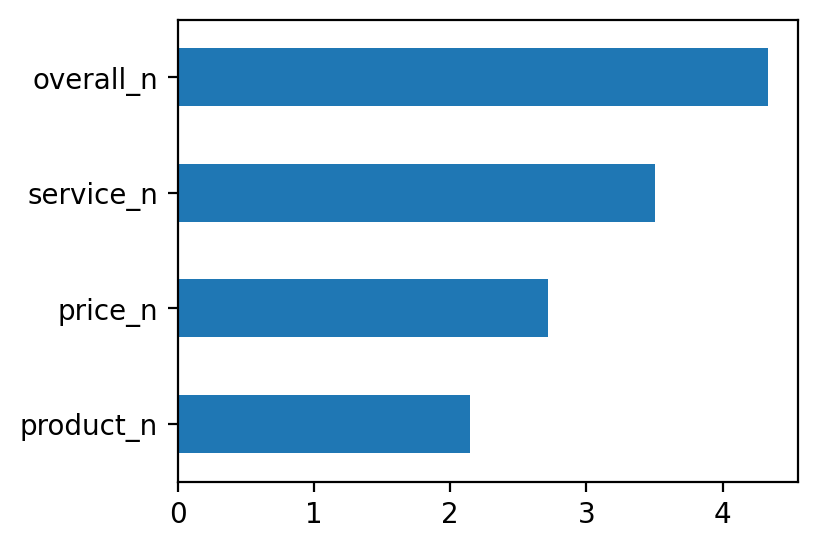

In [260]:
df.loc[:, 'product_n':'overall_n'].mean().plot(figsize=(4,3), kind='barh');

## Multi-value column to dummy variables

In [261]:
dskills = df['skills'].str.get_dummies(', ')
dskills

,Access,Excel,PowerPoint,Python,R,SPSS,SQL,Word
0,0,1,1,1,1,0,1,1
1,0,1,1,0,0,1,0,1
2,0,1,0,1,1,0,1,0
3,1,1,1,0,0,0,0,1
4,0,1,0,1,1,1,0,0
5,0,0,0,0,0,0,0,0
6,0,1,0,0,1,0,1,0
7,0,0,0,0,0,0,0,0


In [262]:
df = pd.concat([df, dskills], axis=1).copy()
df.head()

,Timestamp,age (years),gender,product,price,service,overall,skills,alpha,beta,gamma,product_n,price_n,service_n,overall_n,Access,Excel,PowerPoint,Python,R,SPSS,SQL,Word
0,2021-03-09 07:28:24.801,21.0,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,bakery,1.0,2.0,3.0,5.0,0,1,1,1,1,0,1,1
1,2021-03-09 07:35:55.097,18.0,F,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",tea,2.0,3.0,4.0,5.0,0,1,1,0,0,1,0,1
2,2021-03-09 08:11:57.871,35.0,X,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream","coffee, bakery",2.0,3.0,4.0,5.0,0,1,0,1,1,0,1,0
3,2021-03-09 08:12:30.173,21.0,X,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery","tea, bakery, ice cream",4.0,3.0,2.0,1.0,1,1,1,0,0,0,0,1
4,2021-03-09 11:28:54.492,33.0,F,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,"coffee, tea, bakery, ice cream",4.0,4.0,5.0,5.0,0,1,0,1,1,1,0,0


In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    8 non-null      datetime64[ns]
 1   age (years)  7 non-null      float64       
 2   gender       6 non-null      object        
 3   product      7 non-null      object        
 4   price        7 non-null      object        
 5   service      6 non-null      object        
 6   overall      6 non-null      object        
 7   skills       6 non-null      object        
 8   alpha        8 non-null      object        
 9   beta         7 non-null      object        
 10  gamma        8 non-null      object        
 11  product_n    7 non-null      float64       
 12  price_n      7 non-null      float64       
 13  service_n    6 non-null      float64       
 14  overall_n    6 non-null      float64       
 15  Access       8 non-null      int64         
 16  Excel       

In [264]:
df.loc[:, ['Excel', 'SQL', 'Python']].sum()

Excel     6
SQL       3
Python    3
dtype: int64

In [265]:
df.loc[:, ['Excel', 'SQL', 'Python']].sum(axis=1)

0    3
1    1
2    3
3    1
4    2
5    0
6    2
7    0
dtype: int64

In [266]:
df.columns

Index(['Timestamp', 'age (years)', 'gender', 'product', 'price', 'service',
       'overall', 'skills', 'alpha', 'beta', 'gamma', 'product_n', 'price_n',
       'service_n', 'overall_n', 'Access', 'Excel', 'PowerPoint', 'Python',
       'R', 'SPSS', 'SQL', 'Word'],
      dtype='object')

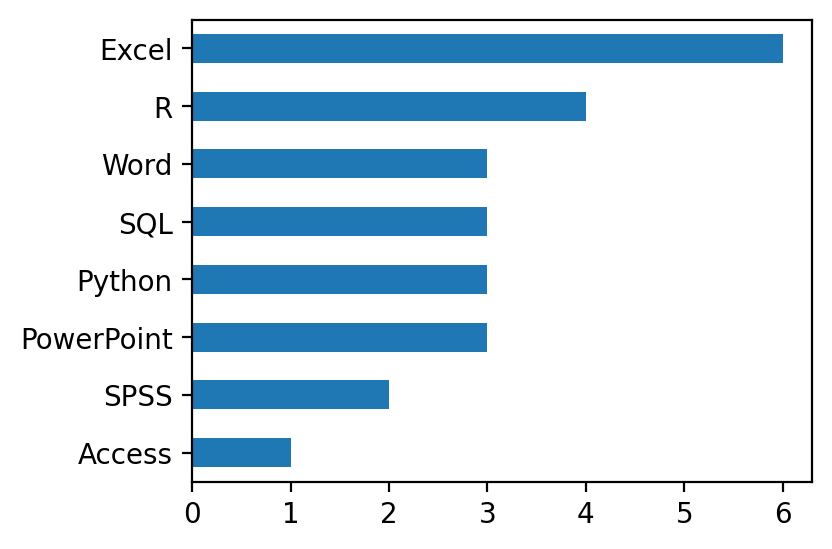

In [268]:
df.loc[:, 'Access':'Word'].sum().sort_values().plot(figsize=(4,3), kind='barh');

## Preprocess grid checkbox

In [269]:
dtemps = []
dtemps.append(df)
multival_cols = ['alpha', 'beta',  'gamma']

for c in multival_cols:
    dtemp = df[c].str.get_dummies(', ')
    dtemp.columns = [f"{c}_{p}" for p in dtemp.columns]
    dtemps.append(dtemp)
    
dtemps

[                Timestamp  age (years) gender  ... SPSS SQL Word
 0 2021-03-09 07:28:24.801  21.0         M      ...  0    1   1  
 1 2021-03-09 07:35:55.097  18.0         F      ...  1    0   1  
 2 2021-03-09 08:11:57.871  35.0         X      ...  0    1   0  
 3 2021-03-09 08:12:30.173  21.0         X      ...  0    0   1  
 4 2021-03-09 11:28:54.492  33.0         F      ...  1    0   0  
 5 2021-03-09 22:12:09.455  44.0         NaN    ...  0    0   0  
 6 2021-03-11 07:59:04.920  44.0         M      ...  0    1   0  
 7 2021-03-11 08:04:16.205 NaN           NaN    ...  0    0   0  
 
 [8 rows x 23 columns],
    alpha_bakery  alpha_coffee  alpha_ice cream  alpha_tea
 0  0             1             0                0        
 1  1             1             1                1        
 2  1             1             1                1        
 3  0             0             0                1        
 4  0             0             0                1        
 5  0             1       

In [272]:
dtemps = []
dtemps.append(df)
multival_cols = ['alpha', 'beta',  'gamma']

for c in multival_cols:
    dtemp = df[c].str.get_dummies(', ')
    dtemp.columns = [f"{c}_{p}" for p in dtemp.columns]
    dtemps.append(dtemp)
    
data=pd.concat(dtemps, axis=1)
data.head()

,Timestamp,age (years),gender,product,price,service,overall,skills,alpha,beta,gamma,product_n,price_n,service_n,overall_n,Access,Excel,PowerPoint,Python,R,SPSS,SQL,Word,alpha_bakery,alpha_coffee,alpha_ice cream,alpha_tea,beta_bakery,beta_coffee,beta_ice cream,beta_tea,gamma_bakery,gamma_coffee,gamma_ice cream,gamma_tea
0,2021-03-09 07:28:24.801,21.0,M,very dissatisfied,dissatisfied,neutral,very satisfied,"Word, Excel, PowerPoint, SQL, Python, R",coffee,tea,bakery,1.0,2.0,3.0,5.0,0,1,1,1,1,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0
1,2021-03-09 07:35:55.097,18.0,F,dissatisfied,neutral,satisfied,very satisfied,"Word, Excel, PowerPoint, SPSS","coffee, tea, bakery, ice cream","coffee, tea, bakery",tea,2.0,3.0,4.0,5.0,0,1,1,0,0,1,0,1,1,1,1,1,1,1,0,1,0,0,0,1
2,2021-03-09 08:11:57.871,35.0,X,dissatisfied,neutral,satisfied,very satisfied,"Excel, SQL, Python, R","coffee, tea, bakery, ice cream","tea, ice cream","coffee, bakery",2.0,3.0,4.0,5.0,0,1,0,1,1,0,1,0,1,1,1,1,0,0,1,1,1,1,0,0
3,2021-03-09 08:12:30.173,21.0,X,satisfied,neutral,dissatisfied,very dissatisfied,"Word, Excel, PowerPoint, Access",tea,"coffee, bakery","tea, bakery, ice cream",4.0,3.0,2.0,1.0,1,1,1,0,0,0,0,1,0,0,0,1,1,1,0,0,1,0,1,1
4,2021-03-09 11:28:54.492,33.0,F,satisfied,satisfied,very satisfied,very satisfied,"Excel, Python, R, SPSS",tea,bakery,"coffee, tea, bakery, ice cream",4.0,4.0,5.0,5.0,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,1,1,1


In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        8 non-null      datetime64[ns]
 1   age (years)      7 non-null      float64       
 2   gender           6 non-null      object        
 3   product          7 non-null      object        
 4   price            7 non-null      object        
 5   service          6 non-null      object        
 6   overall          6 non-null      object        
 7   skills           6 non-null      object        
 8   alpha            8 non-null      object        
 9   beta             7 non-null      object        
 10  gamma            8 non-null      object        
 11  product_n        7 non-null      float64       
 12  price_n          7 non-null      float64       
 13  service_n        6 non-null      float64       
 14  overall_n        6 non-null      float64      

In [273]:
data.loc[:, 'alpha_bakery':'alpha_tea']

,alpha_bakery,alpha_coffee,alpha_ice cream,alpha_tea
0,0,1,0,0
1,1,1,1,1
2,1,1,1,1
3,0,0,0,1
4,0,0,0,1
5,0,1,0,0
6,0,1,0,1
7,0,0,0,1


In [274]:
data.columns.str.contains('alpha')

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False])

In [275]:
data.columns[data.columns.str.contains('alpha')]

Index(['alpha', 'alpha_bakery', 'alpha_coffee', 'alpha_ice cream',
       'alpha_tea'],
      dtype='object')

In [276]:
data[data.columns[data.columns.str.contains('alpha')]]

,alpha,alpha_bakery,alpha_coffee,alpha_ice cream,alpha_tea
0,coffee,0,1,0,0
1,"coffee, tea, bakery, ice cream",1,1,1,1
2,"coffee, tea, bakery, ice cream",1,1,1,1
3,tea,0,0,0,1
4,tea,0,0,0,1
5,coffee,0,1,0,0
6,"coffee, tea",0,1,0,1
7,tea,0,0,0,1


In [277]:
data[data.columns[data.columns.str.contains('alpha_|beta_|gamma_')]]

,alpha_bakery,alpha_coffee,alpha_ice cream,alpha_tea,beta_bakery,beta_coffee,beta_ice cream,beta_tea,gamma_bakery,gamma_coffee,gamma_ice cream,gamma_tea
0,0,1,0,0,0,0,0,1,1,0,0,0
1,1,1,1,1,1,1,0,1,0,0,0,1
2,1,1,1,1,0,0,1,1,1,1,0,0
3,0,0,0,1,1,1,0,0,1,0,1,1
4,0,0,0,1,1,0,0,0,1,1,1,1
5,0,1,0,0,0,0,0,0,0,0,0,1
6,0,1,0,1,1,0,0,1,0,1,1,0
7,0,0,0,1,0,1,0,0,1,1,1,1


In [278]:
data[data.columns[data.columns.str.contains('alpha_|beta_|gamma_')]].sum()
# data.loc[:, 'alpha_bakery':'gamma_tea'].sum()

alpha_bakery       2
alpha_coffee       5
alpha_ice cream    2
alpha_tea          6
beta_bakery        4
beta_coffee        3
beta_ice cream     1
beta_tea           4
gamma_bakery       5
gamma_coffee       4
gamma_ice cream    4
gamma_tea          5
dtype: int64

In [ ]:
# data.to_csv('data_clean.csv', index=False)